<a href="https://colab.research.google.com/github/ShovalBenjer/Housing_Price_Prediction_Advanced_Regresson_Kaggle/blob/main/machine_learning_project_phase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shoval Benjer id 319037404
# Nadav Falkowski id 207446543
link to kaggle account - https://www.kaggle.com/shovalbenjer

# **TL;DR**
we Loaded and preprocess the dataset by filling missing values, encoding categorical variables, and applying Box-Cox transformation to the target variable. our intial model got optimal results than later results by restricted to linear and gradient decent.
we Split the data into training and validation sets, Standardize the features and train a Lasso regression model using Leave-One-Out Cross-Validation (LOOCV).
we Evaluate the model on the training set using RMSE, R², adjusted R², and MAE metrics.







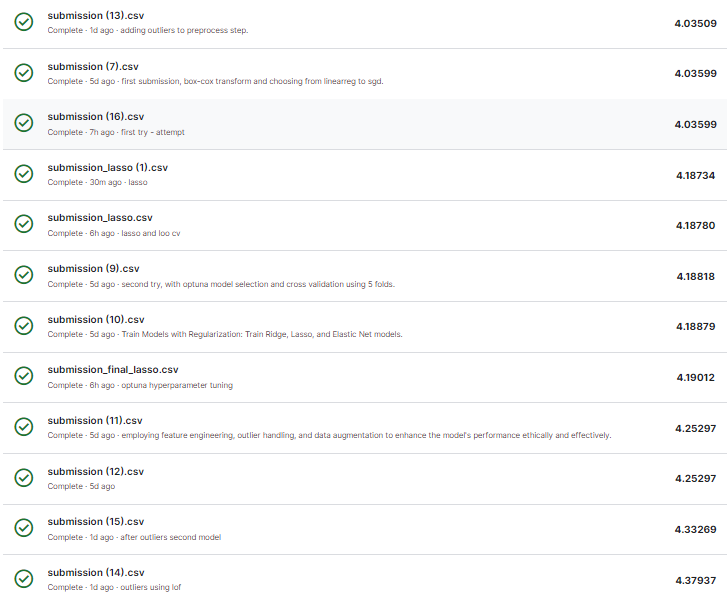

# **Intro** - House Prices - Advanced Regression Techniques
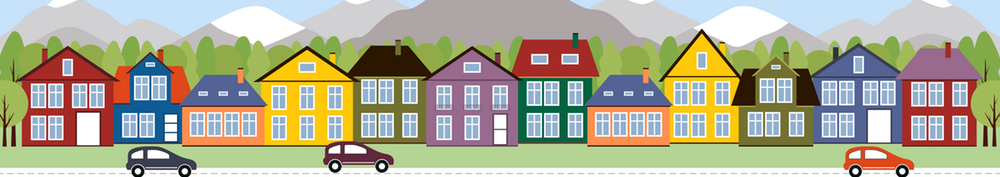
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [6]:
!pip install optuna
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.1 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, LabelEncoder, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import optuna
from optuna.samplers import TPESampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import LeaveOneOut

In [ ]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the dataset
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Prevent line breaks
print("Train Data Head:")
print(train_data.head())

# Display descriptive statistics
print("\nTrain Data Description:")
print(train_data.describe())

# Display data types and non-null counts
print("\nTrain Data Info:")
print(train_data.info())

Train Data Head:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub   
4   5          60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl      Crawfor

In [ ]:
# Output columns of train and test data
print("Train Data Columns:")
print(train_data.columns)

print("\nTest Data Columns:")
print(test_data.columns)

Train Data Columns:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive'

# **Quick basic data preprocessing before EDA**

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
# Fill missing values
for col in train_data.select_dtypes(include=[np.number]).columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)

for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# **EDA - Essential Data Analysis**

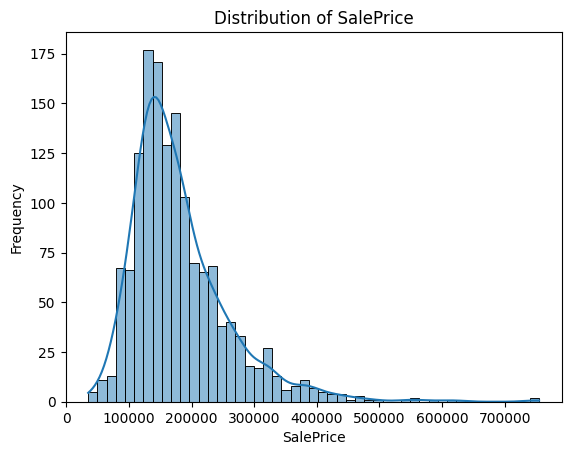

In [ ]:
# Visualize the distribution of SalePrice
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

The distribution of SalePrice is right-skewed, indicating that most houses are priced lower, with fewer high-priced houses. For an SGD/linear regression model, this skewness might lead to suboptimal performance due to the influence of outliers.
we will explore 5 different transforms for which we will normalize the saleprice data distribution:
**log transform,sqaure root transform,box-cox transform,yeo-johnson transorm,rank transform.**
[more information on box-cox and yeo-johnson transforms here:](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html)

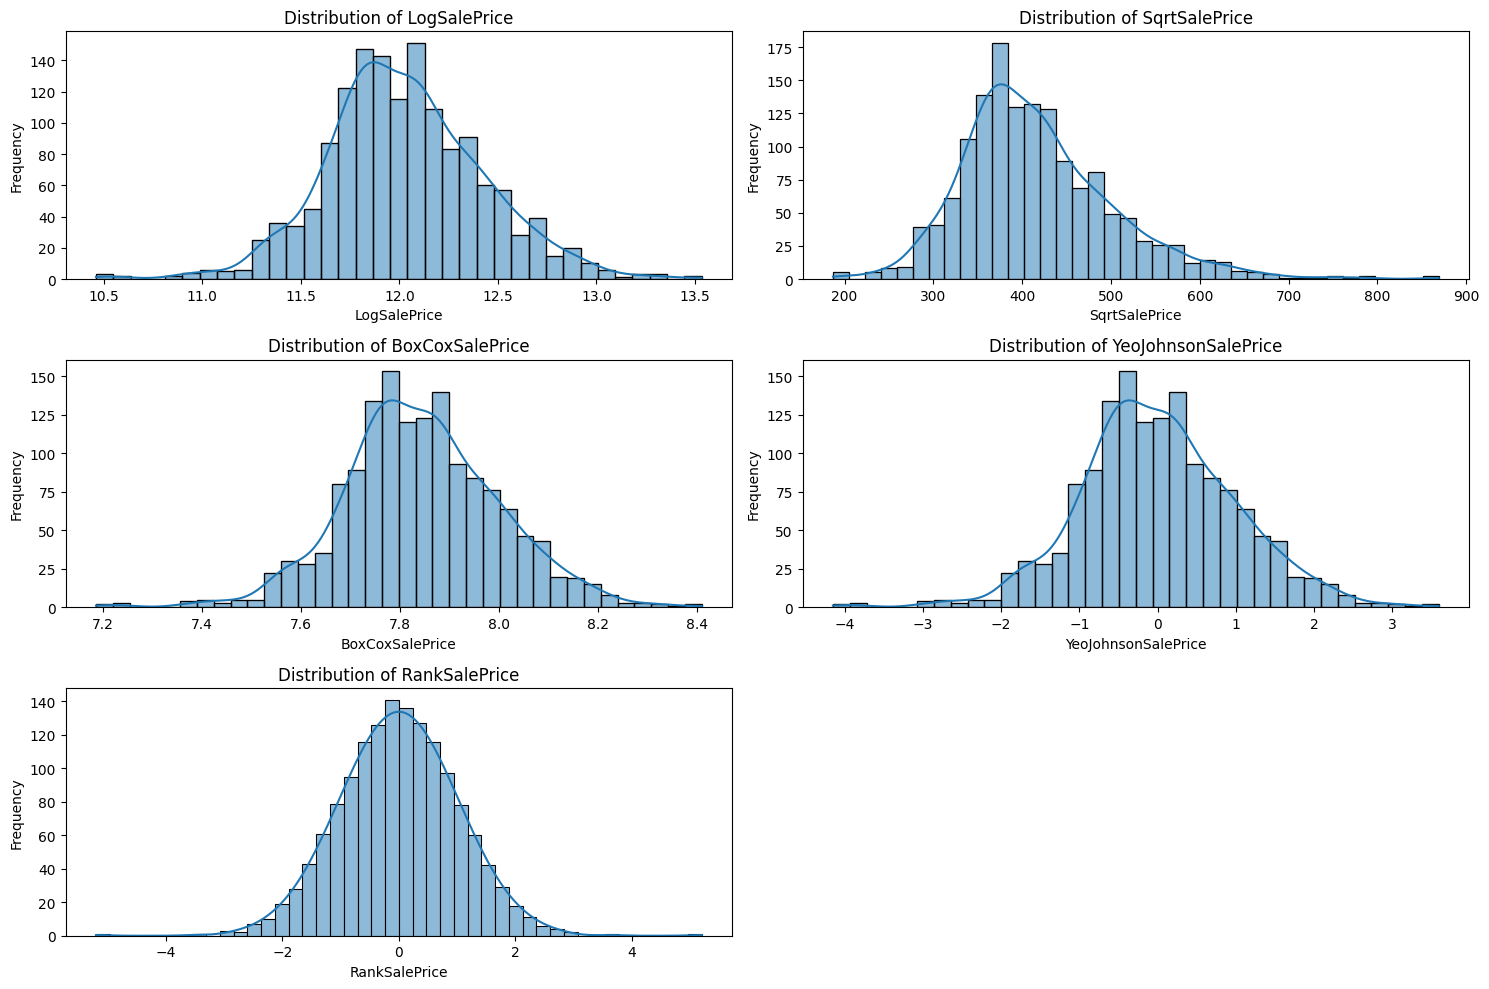

RMSE for each transformation:
LogSalePrice: 0.1553014163275464
SqrtSalePrice: 32.53012182031111
BoxCoxSalePrice: 0.06284945758572007
YeoJohnsonSalePrice: 0.39726995853079683
RankSalePrice: 0.37999784180570645


In [ ]:
train_data['LogSalePrice'] = np.log1p(train_data['SalePrice'])
train_data['SqrtSalePrice'] = np.sqrt(train_data['SalePrice'])
train_data['BoxCoxSalePrice'], _ = stats.boxcox(train_data['SalePrice'])
pt = PowerTransformer(method='yeo-johnson')
train_data['YeoJohnsonSalePrice'] = pt.fit_transform(train_data[['SalePrice']])
qt = QuantileTransformer(output_distribution='normal')
train_data['RankSalePrice'] = qt.fit_transform(train_data[['SalePrice']])
transformations = ['LogSalePrice', 'SqrtSalePrice', 'BoxCoxSalePrice', 'YeoJohnsonSalePrice', 'RankSalePrice']

plt.figure(figsize=(15, 10))
for i, col in enumerate(transformations, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Encode categorical variables
label_encoders = {}
for col in train_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le
# Prepare the data
X = train_data.drop(['SalePrice', 'LogSalePrice', 'SqrtSalePrice', 'BoxCoxSalePrice', 'YeoJohnsonSalePrice', 'RankSalePrice'], axis=1)
# Function to evaluate models
def evaluate_model(target_column):
    y = train_data[target_column]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse

# List of transformations
transformations = ['LogSalePrice', 'SqrtSalePrice', 'BoxCoxSalePrice', 'YeoJohnsonSalePrice', 'RankSalePrice']

# Evaluate each transformation
results = {}
for col in transformations:
    rmse = evaluate_model(col)
    results[col] = rmse

print("RMSE for each transformation:")
for key, value in results.items():
    print(f"{key}: {value}")


By selecting the Box-Cox transformed SalePrice, we leverage the transformation that provided the best performance (lowest RMSE) and ensure the preprocessing and model training steps align with this choice. This approach maximizes the model's accuracy and robustness.

**Relationships between features and SalePrice Before Box-Cox Transformation(Power transform with [0,1] domain**


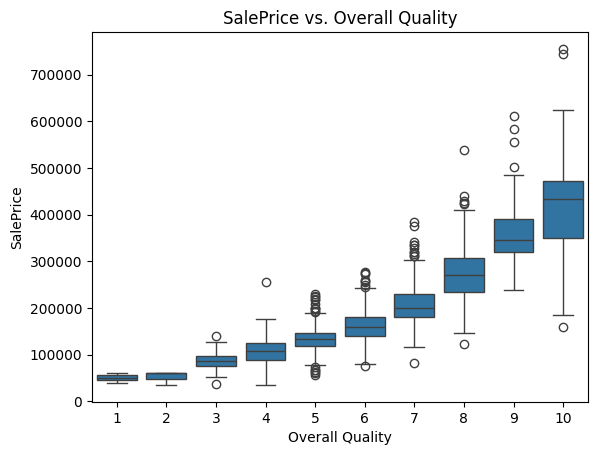

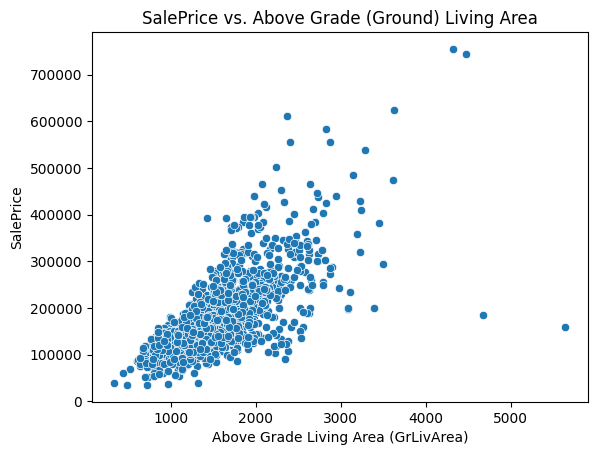

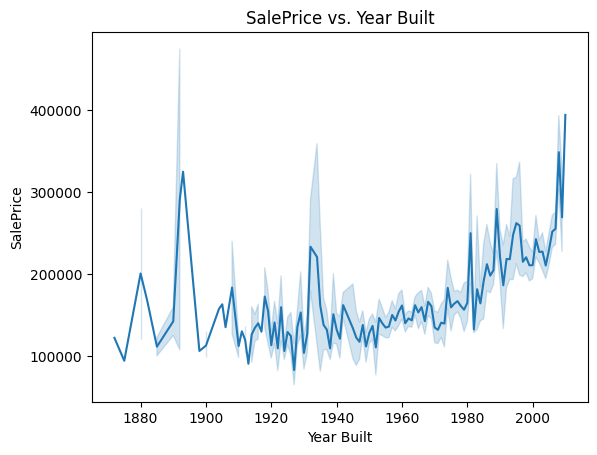

In [ ]:
# Visualize relationships between features and SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('SalePrice vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.title('SalePrice vs. Above Grade (Ground) Living Area')
plt.xlabel('Above Grade Living Area (GrLivArea)')
plt.ylabel('SalePrice')
plt.show()

sns.lineplot(x='YearBuilt', y='SalePrice', data=train_data)
plt.title('SalePrice vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.show()

**After Box-Cox Transformation**

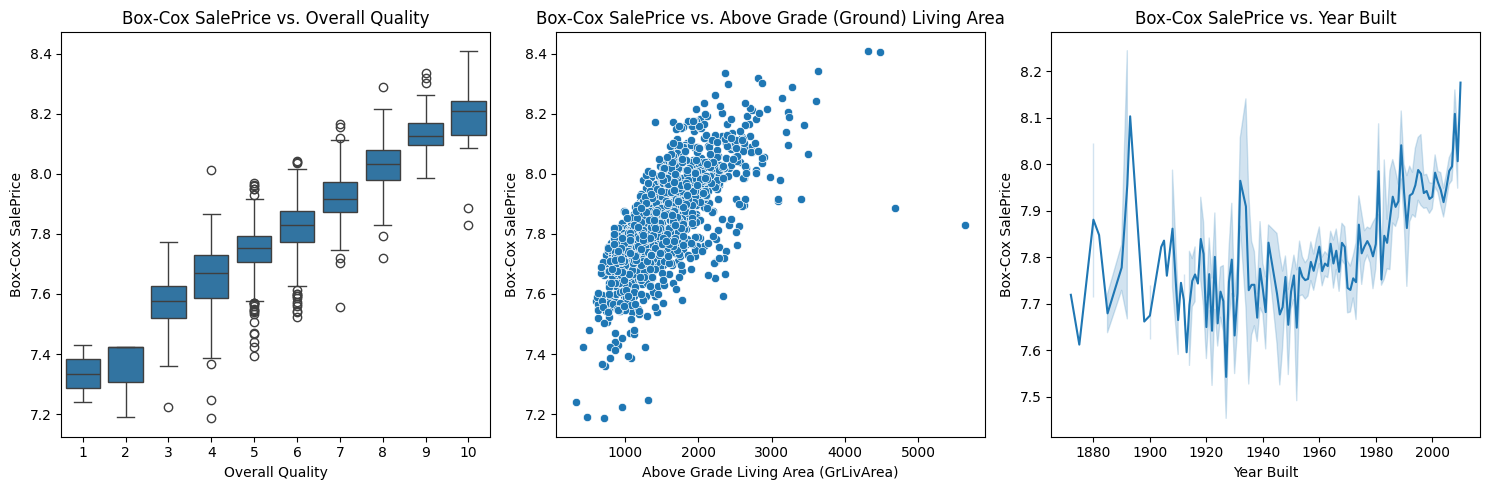

In [ ]:
# Apply Box-Cox Transformation
train_data['BoxCoxSalePrice'], _ = stats.boxcox(train_data['SalePrice'])

# Visualize relationships between features and Box-Cox transformed SalePrice
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='OverallQual', y='BoxCoxSalePrice', data=train_data)
plt.title('Box-Cox SalePrice vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Box-Cox SalePrice')

plt.subplot(1, 3, 2)
sns.scatterplot(x='GrLivArea', y='BoxCoxSalePrice', data=train_data)
plt.title('Box-Cox SalePrice vs. Above Grade (Ground) Living Area')
plt.xlabel('Above Grade Living Area (GrLivArea)')
plt.ylabel('Box-Cox SalePrice')

plt.subplot(1, 3, 3)
sns.lineplot(x='YearBuilt', y='BoxCoxSalePrice', data=train_data)
plt.title('Box-Cox SalePrice vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Box-Cox SalePrice')

plt.tight_layout()
plt.show()


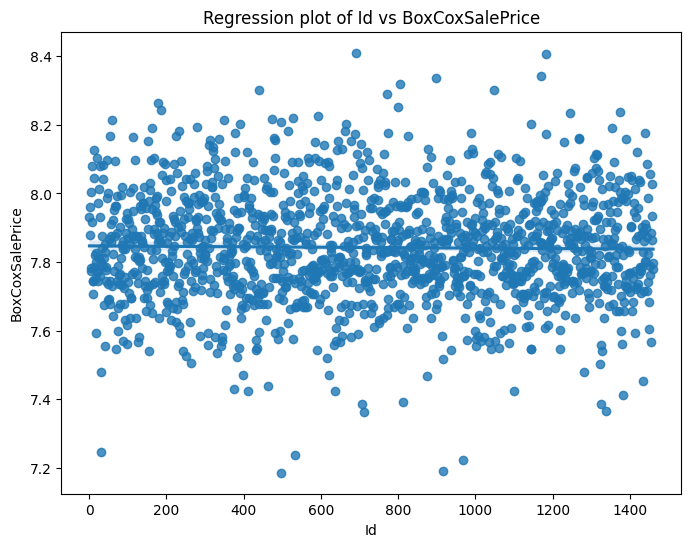

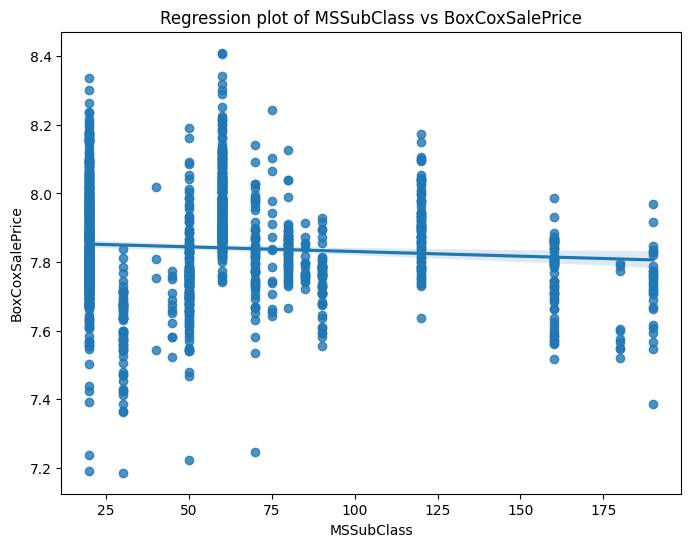

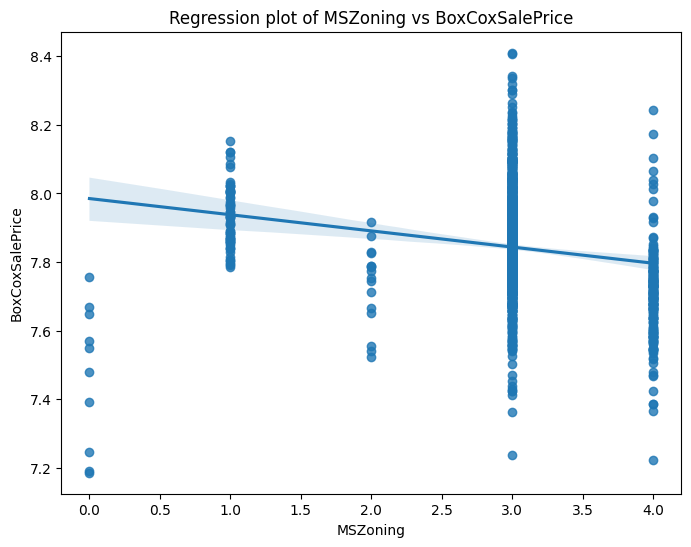

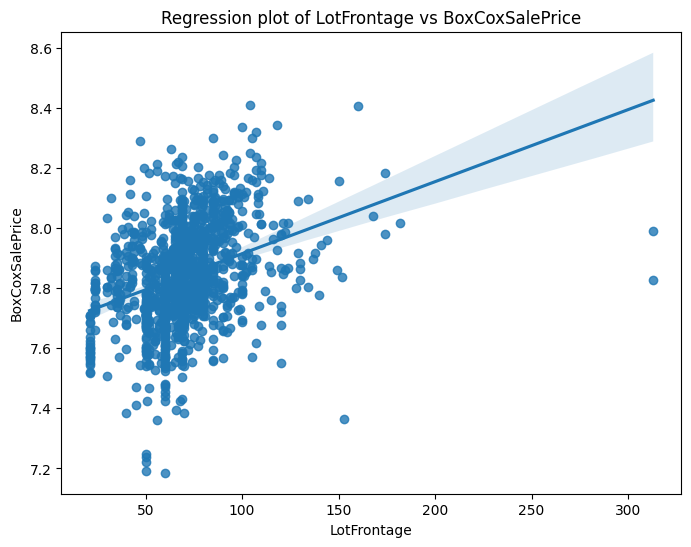

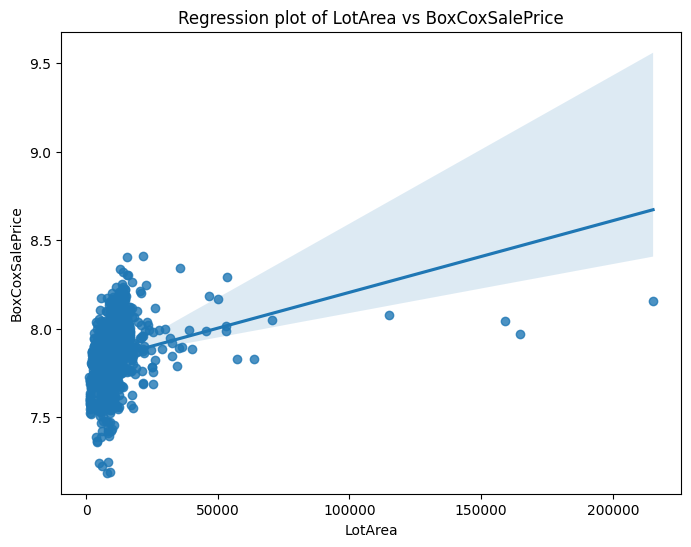

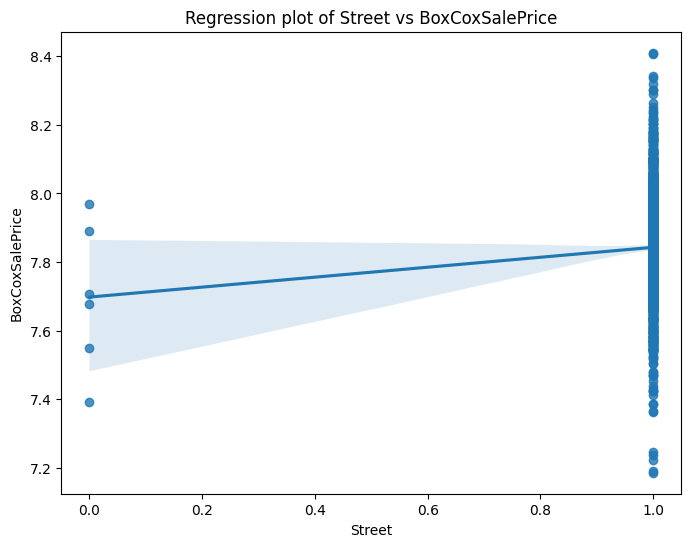

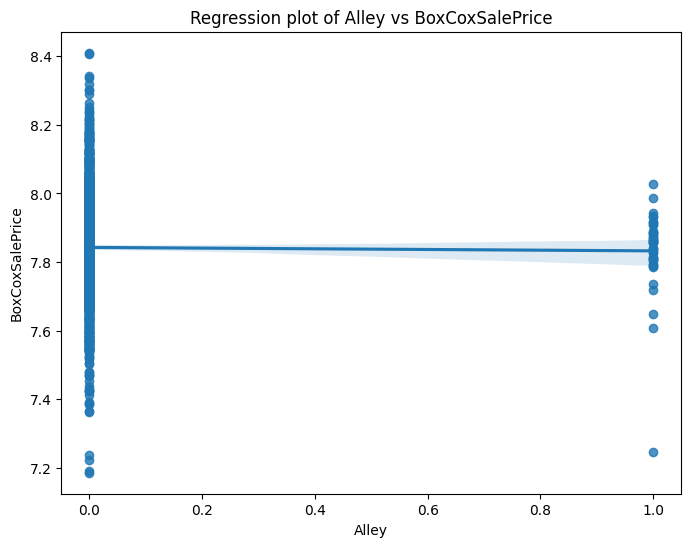

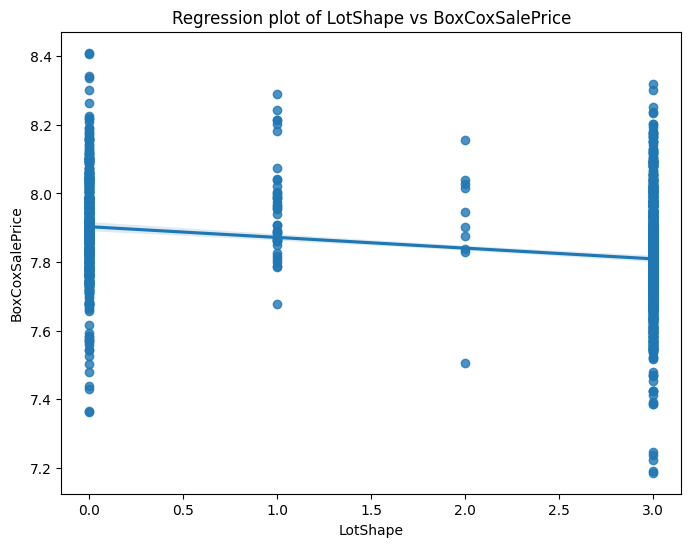

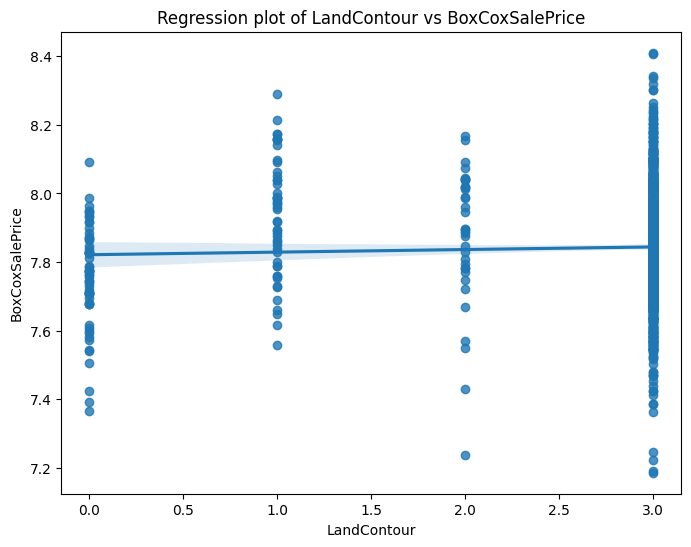

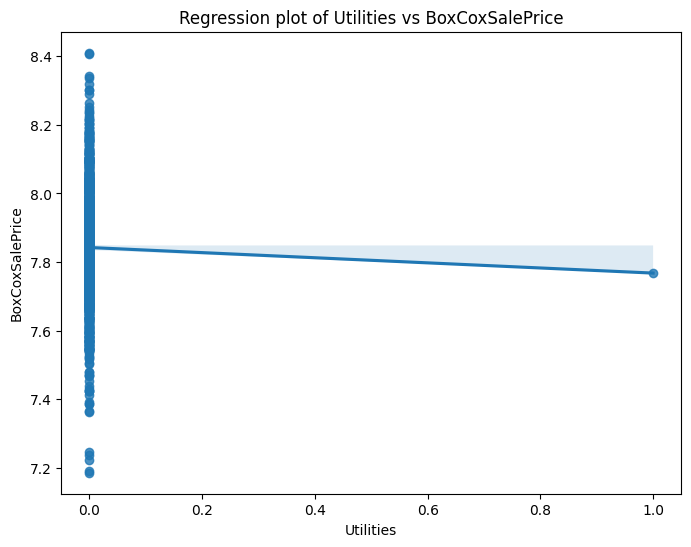

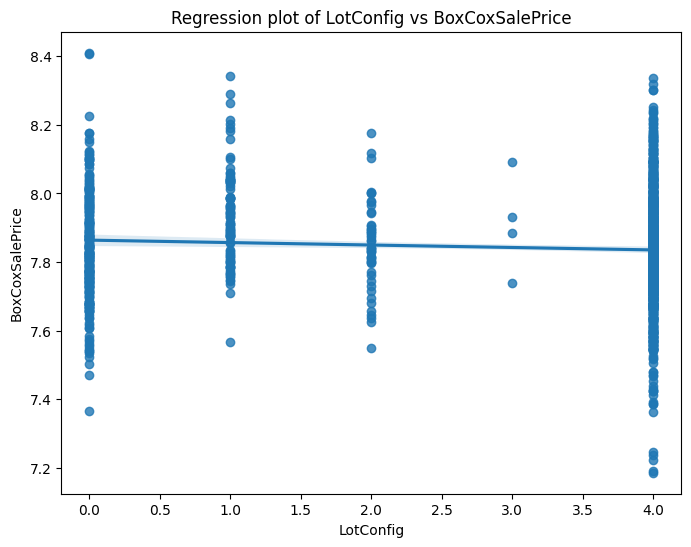

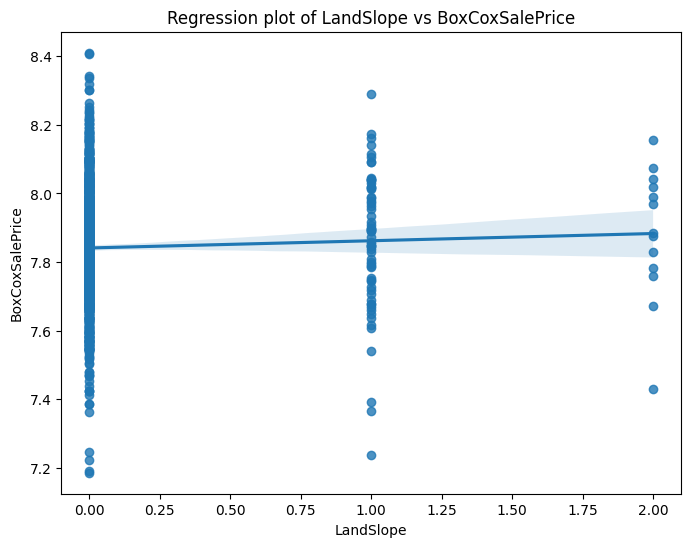

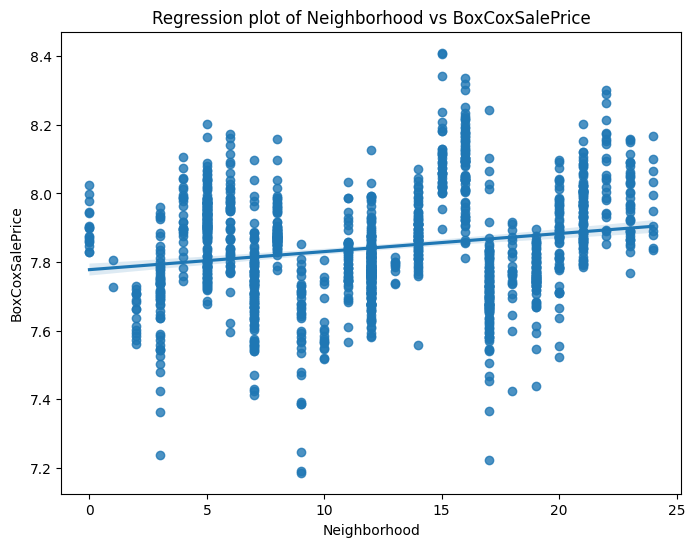

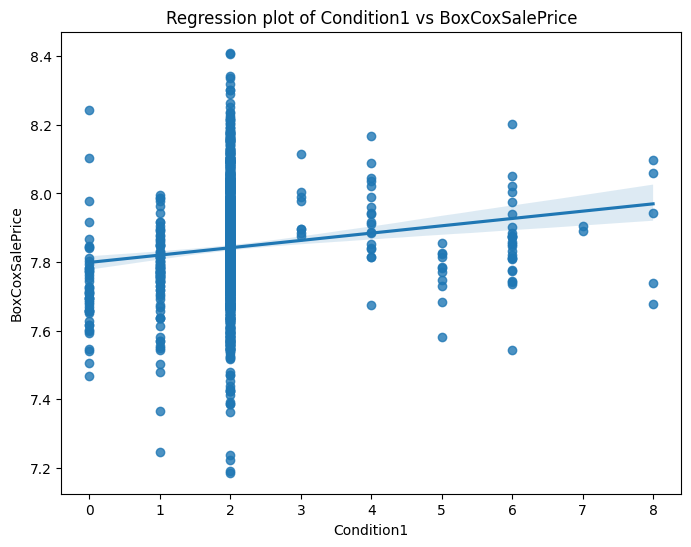

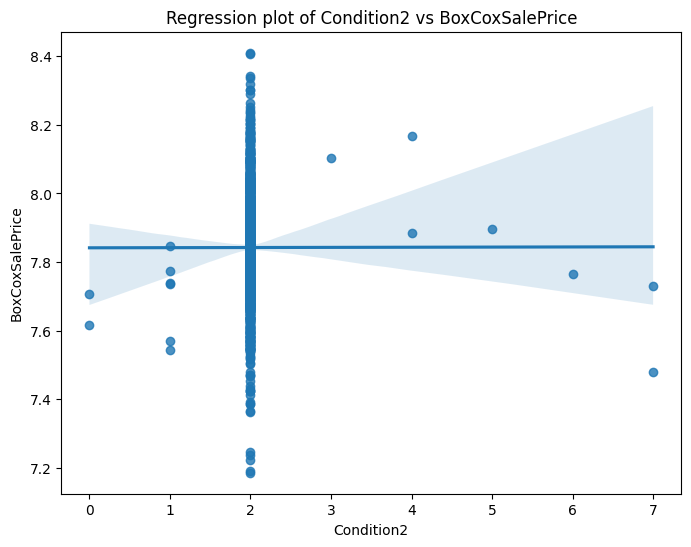

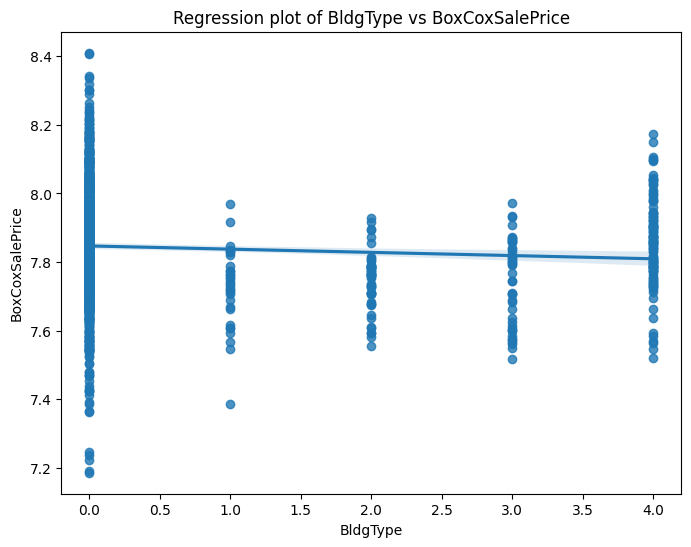

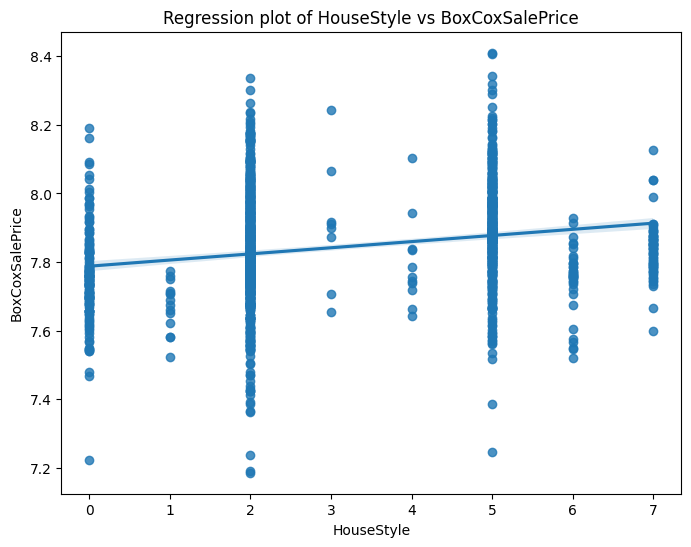

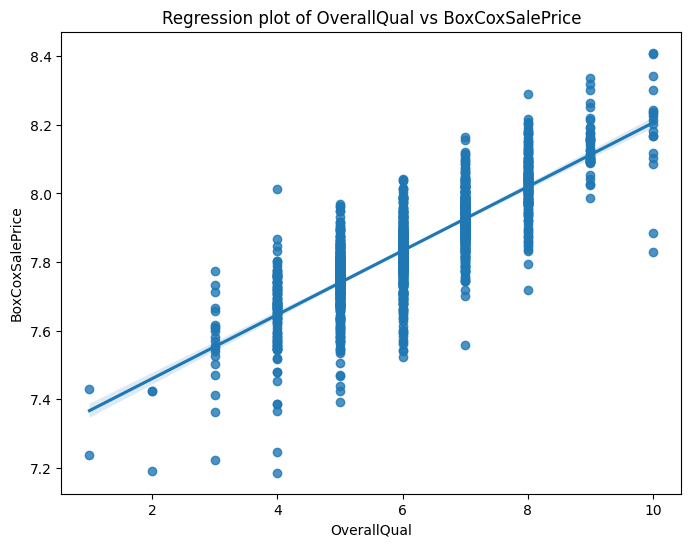

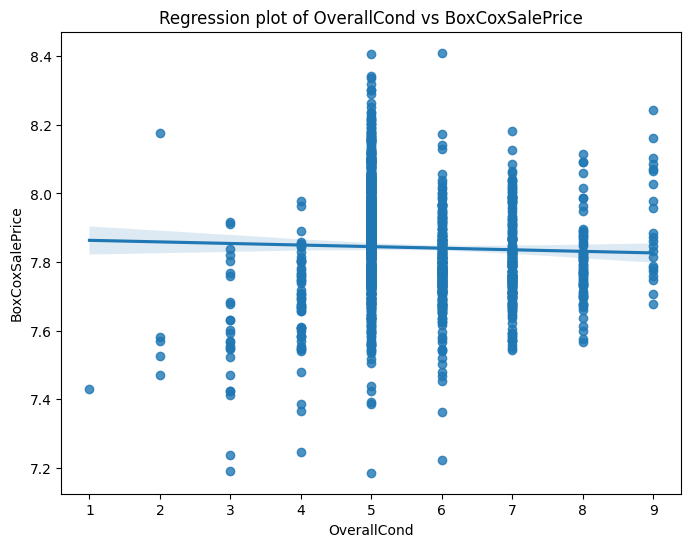

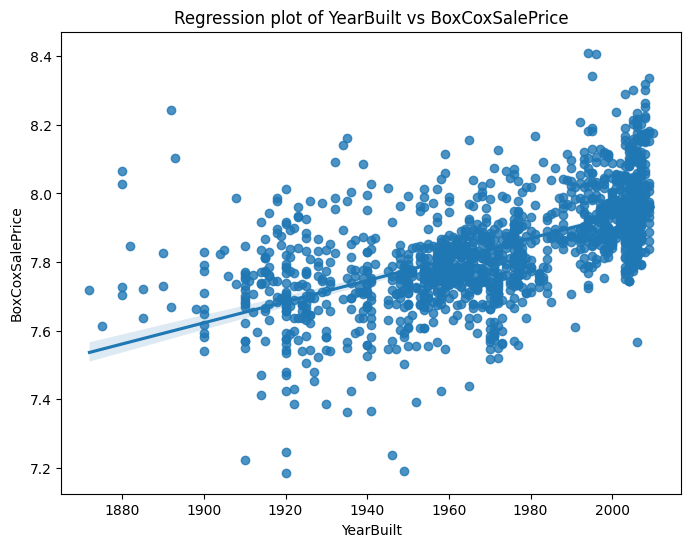

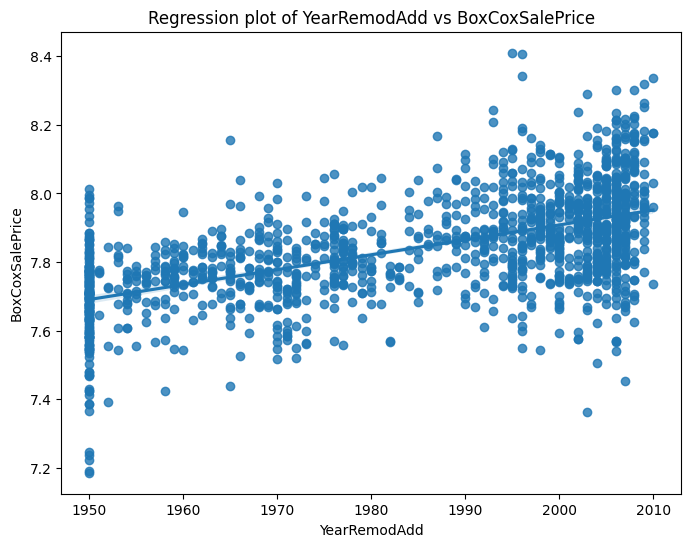

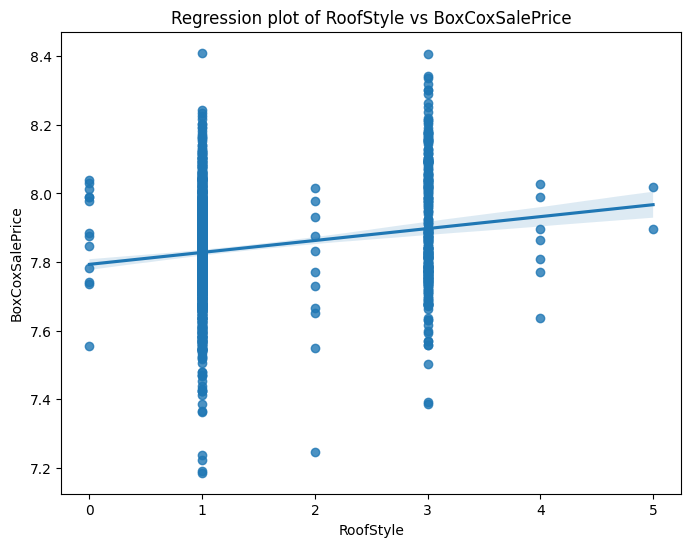

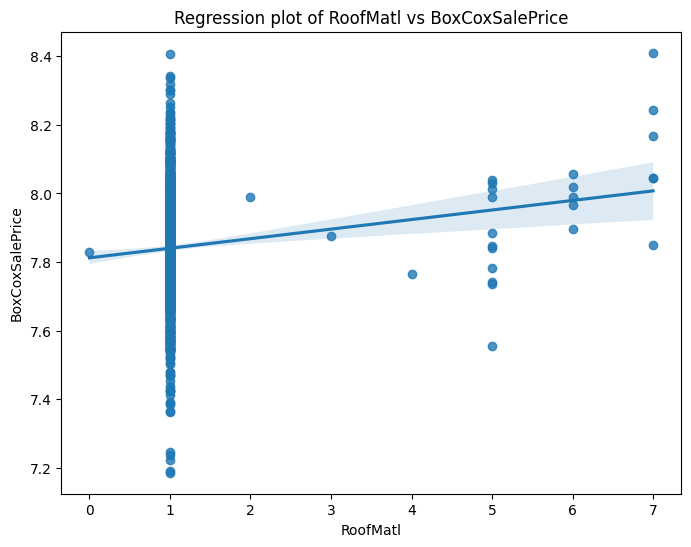

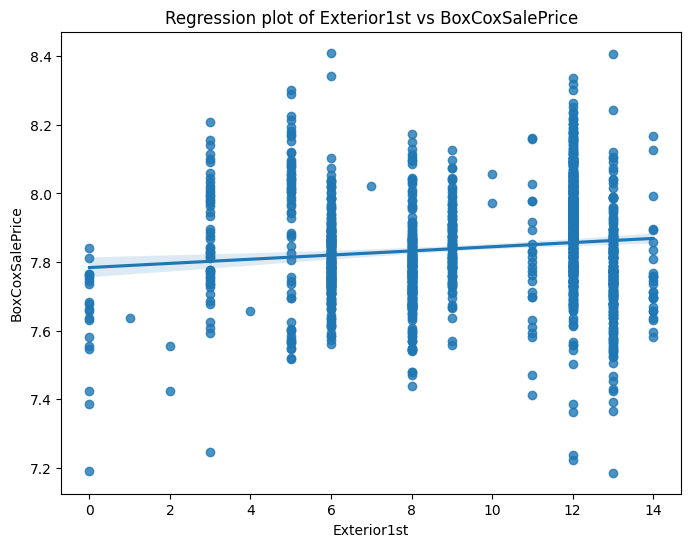

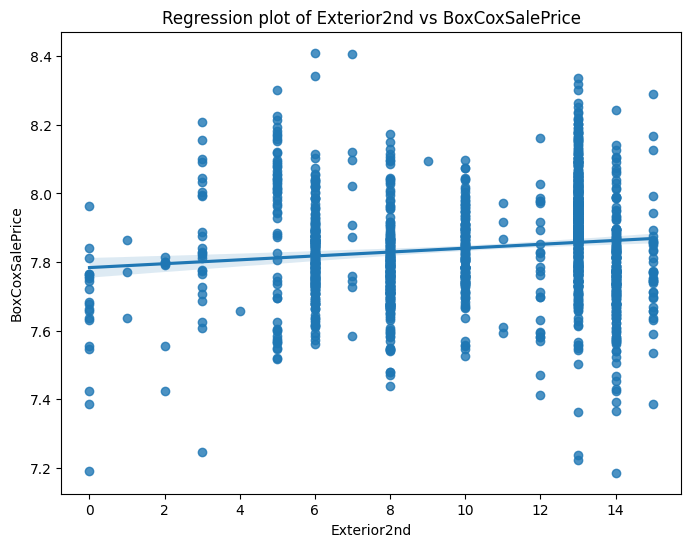

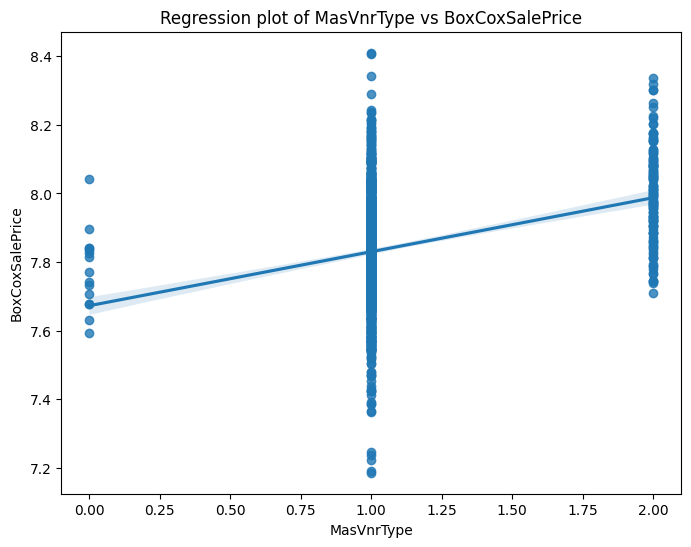

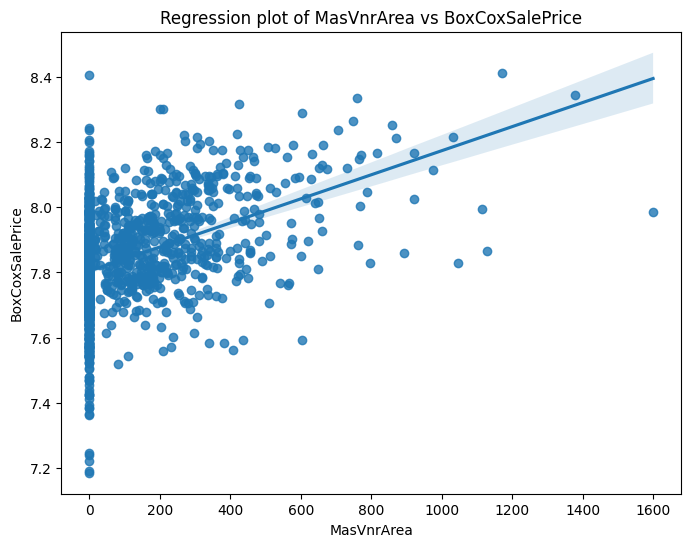

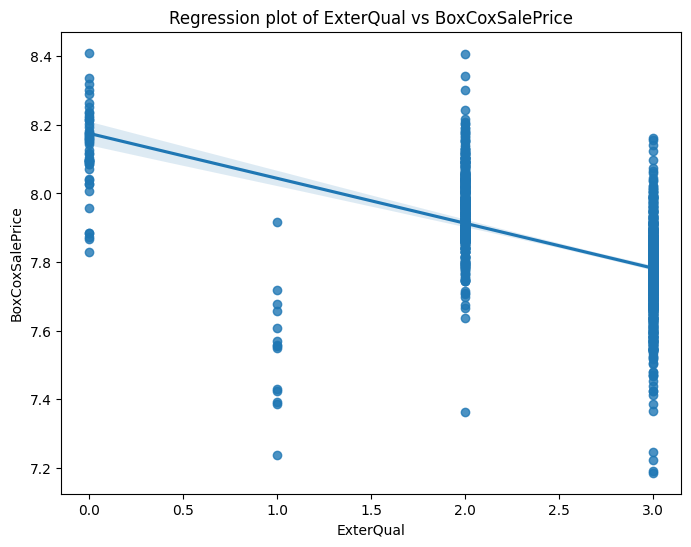

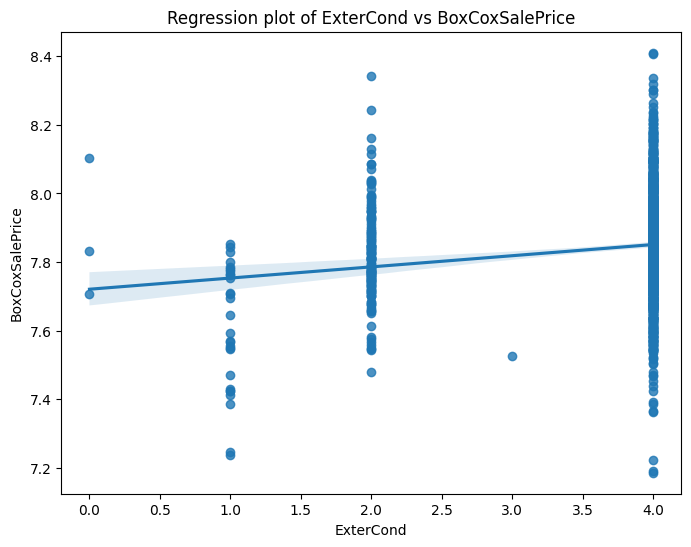

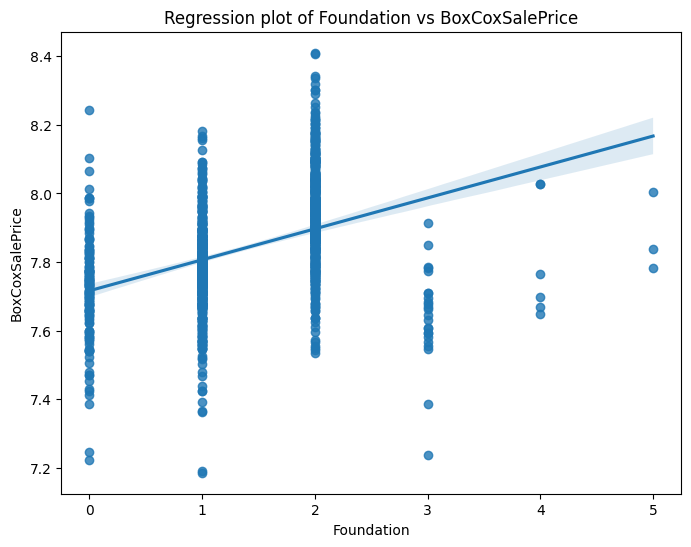

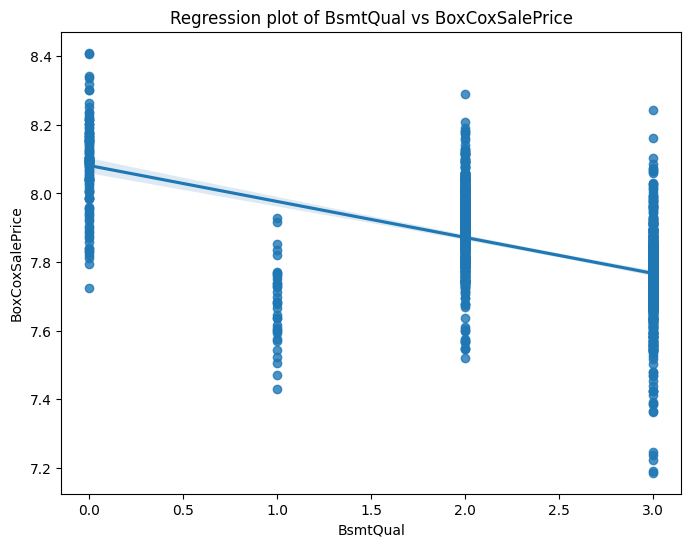

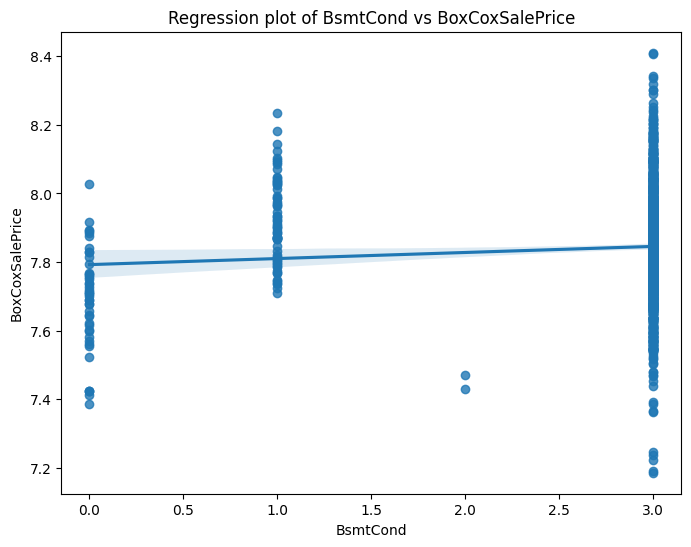

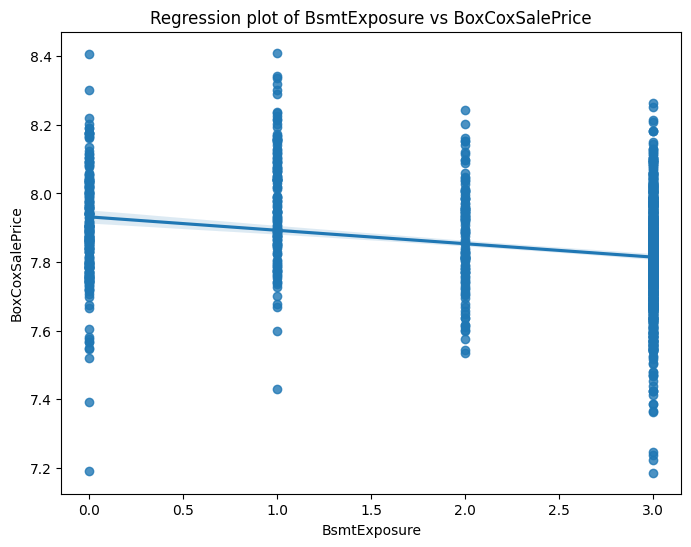

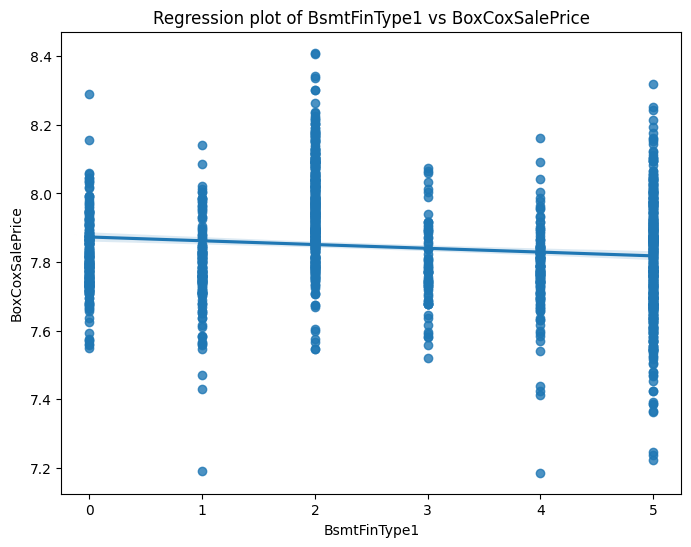

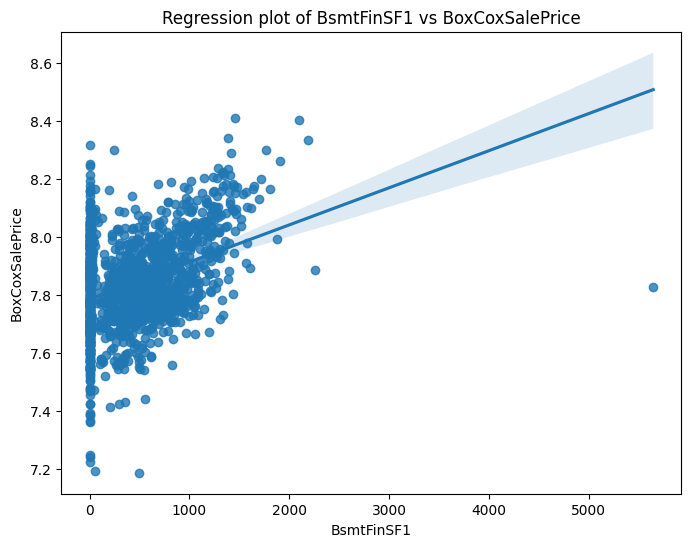

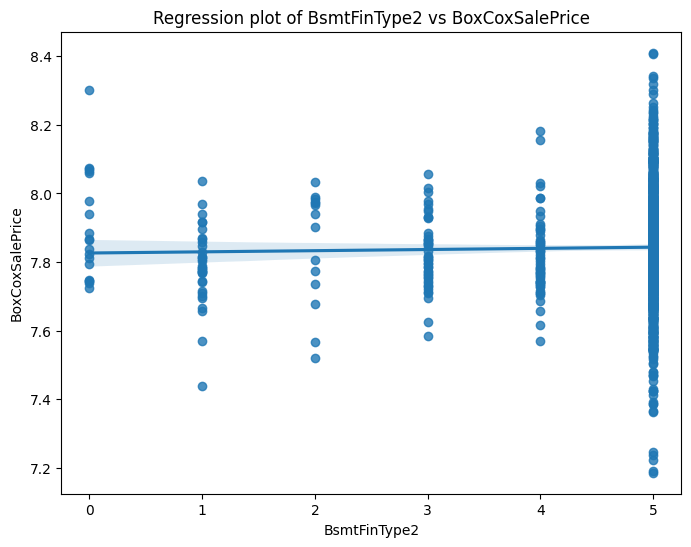

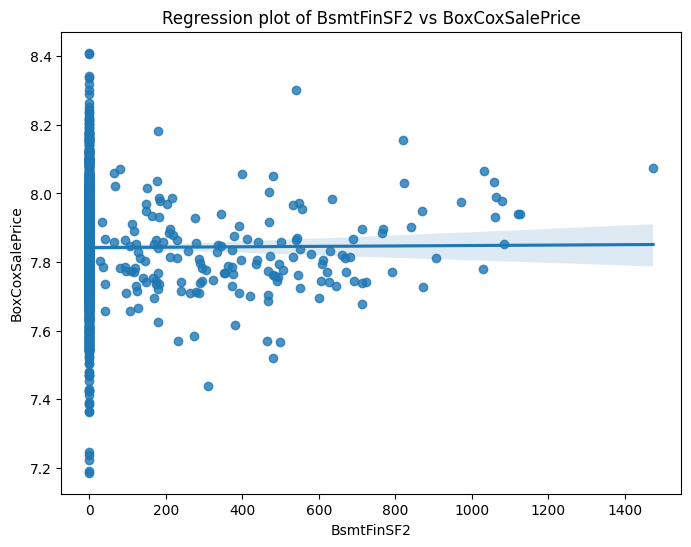

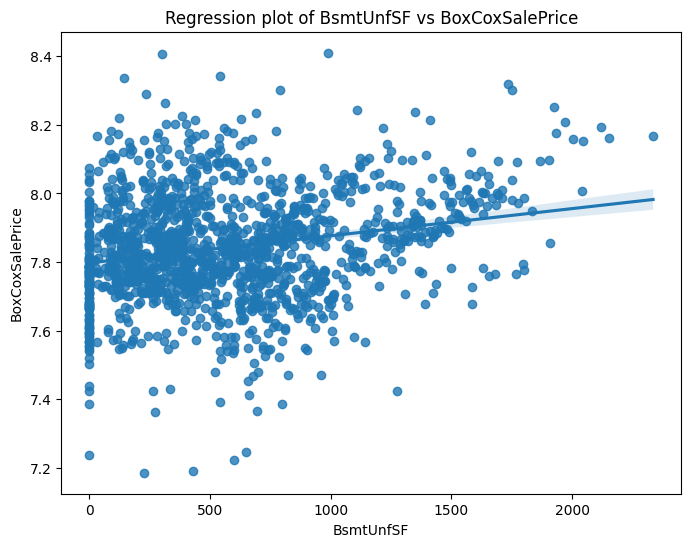

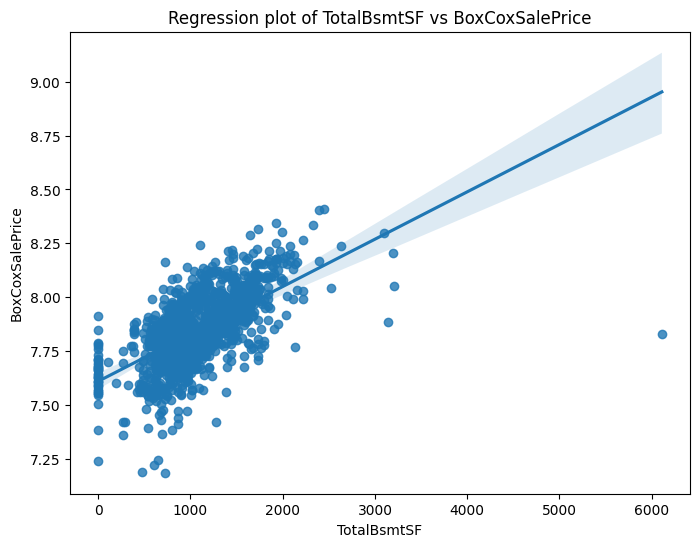

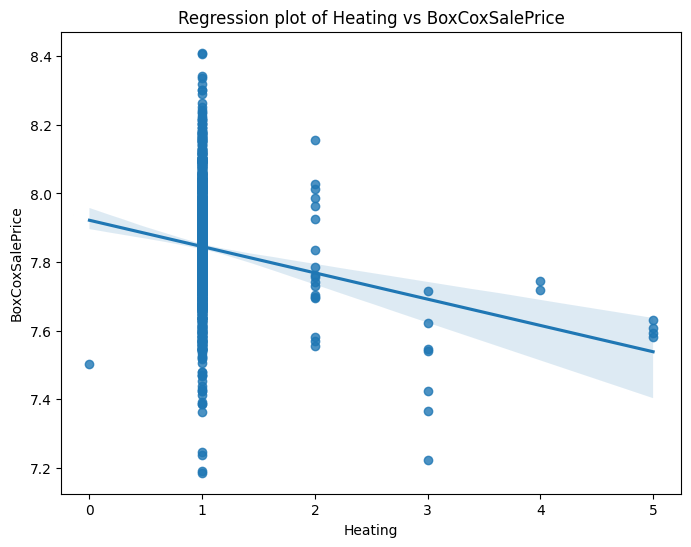

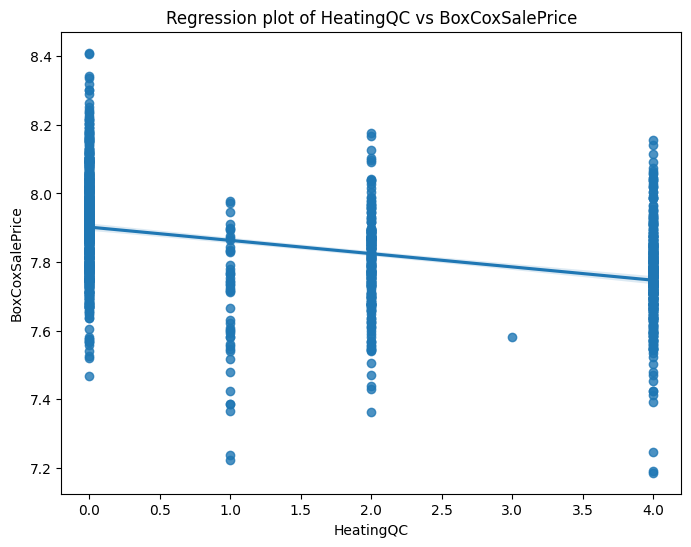

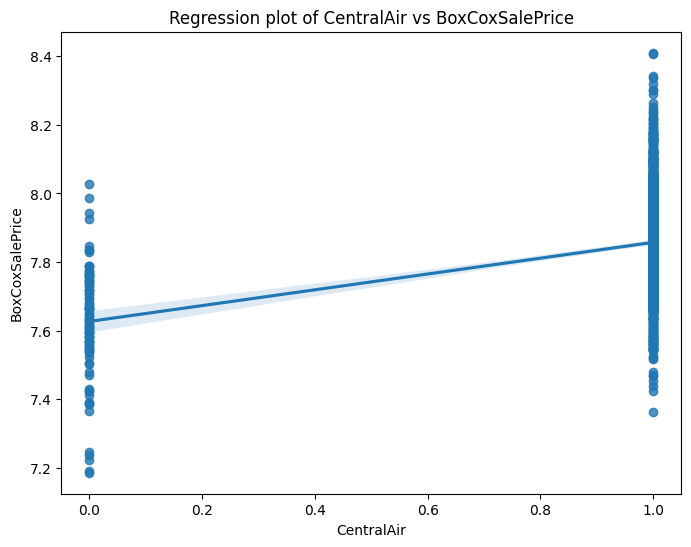

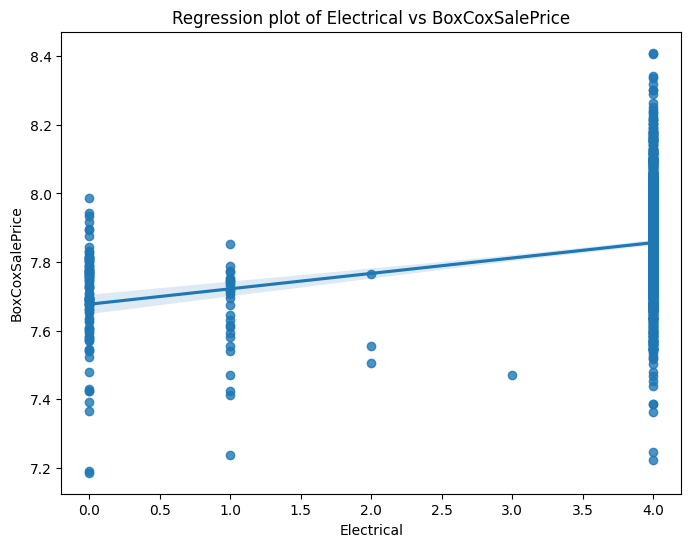

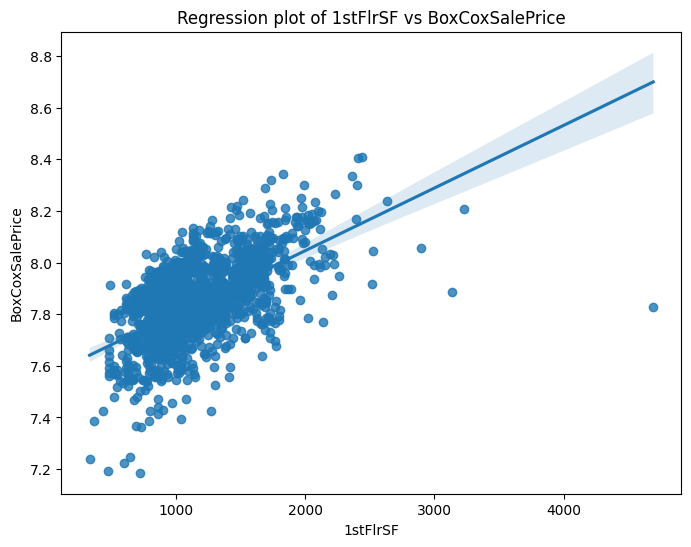

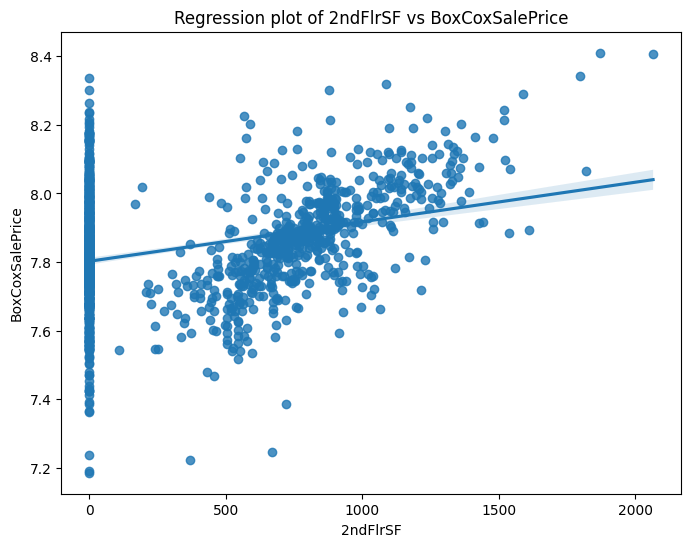

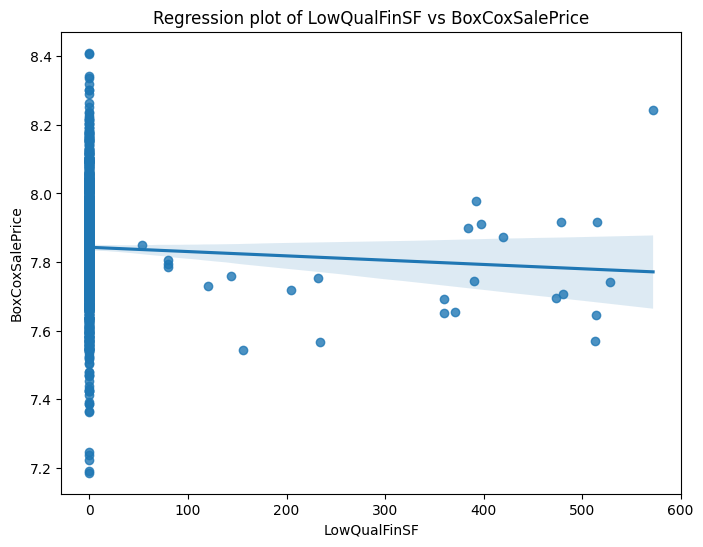

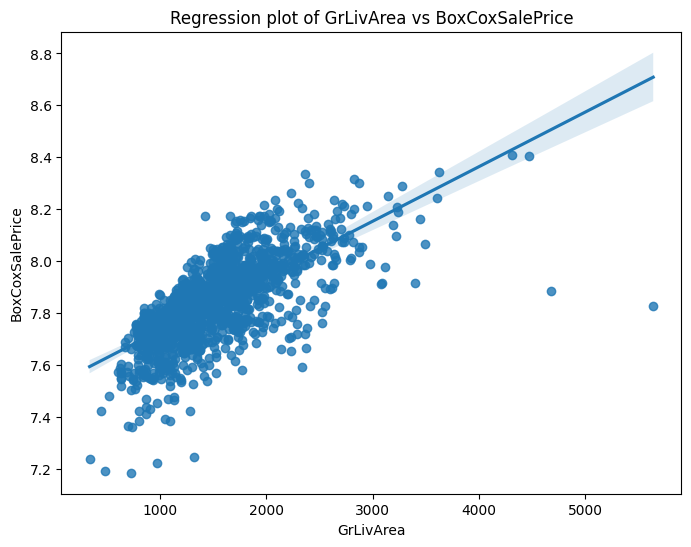

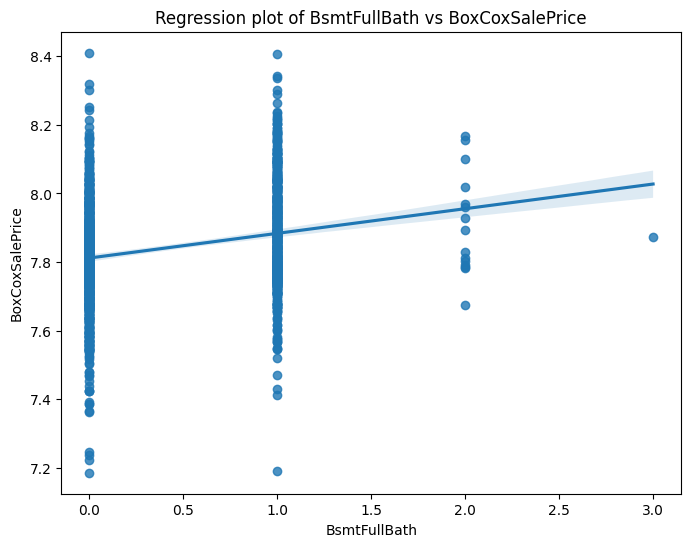

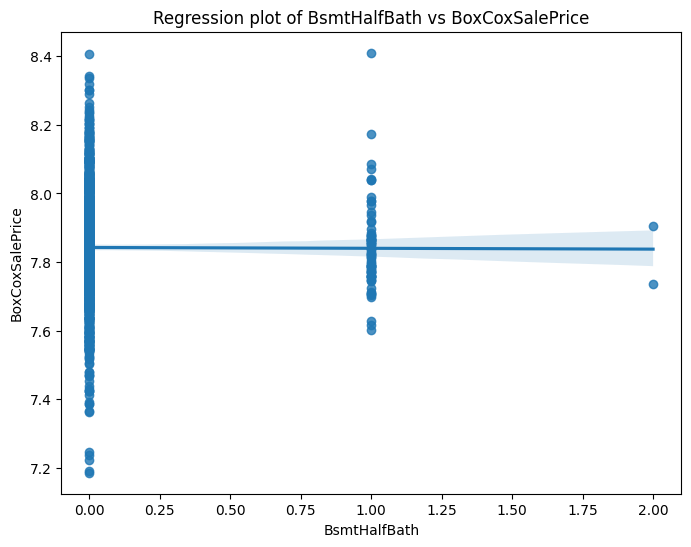

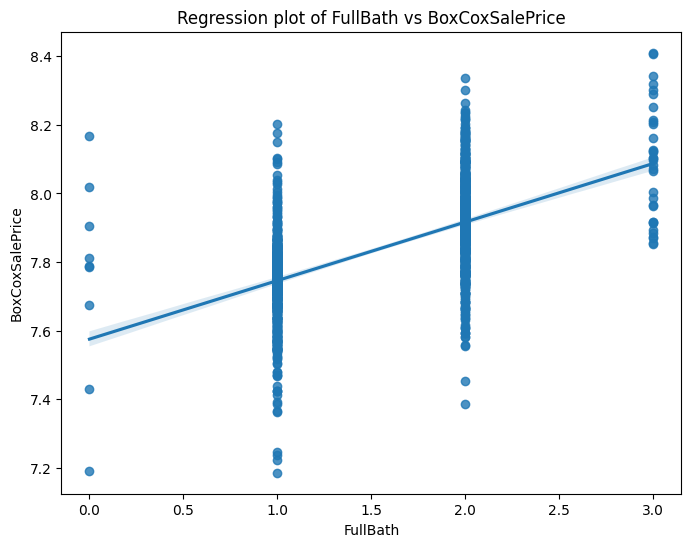

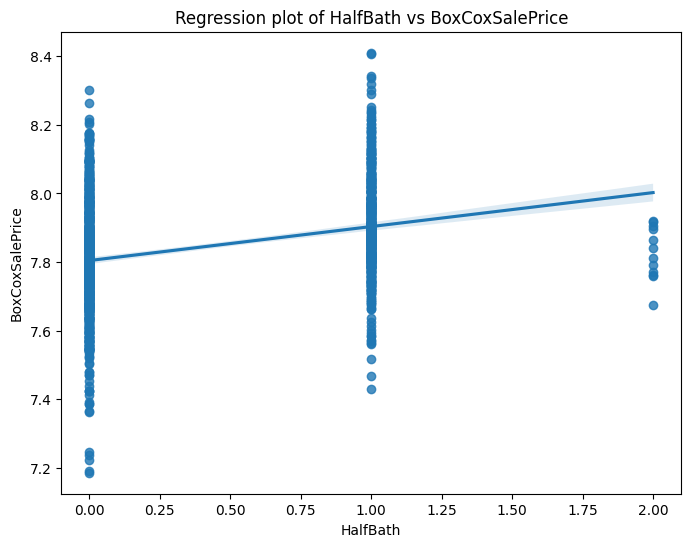

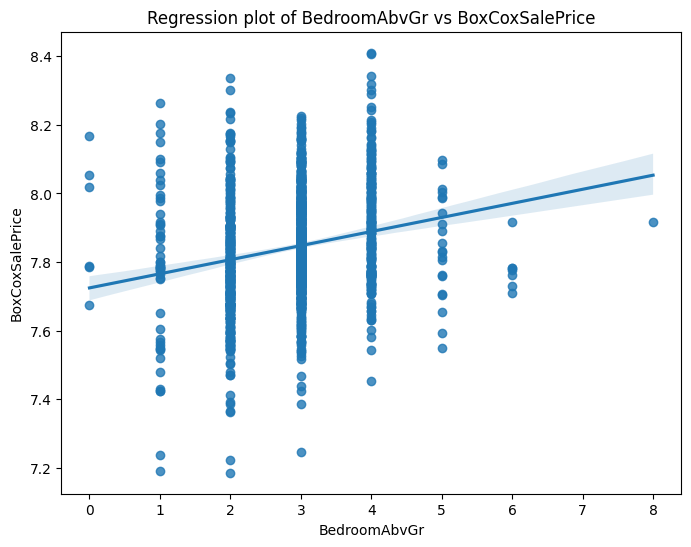

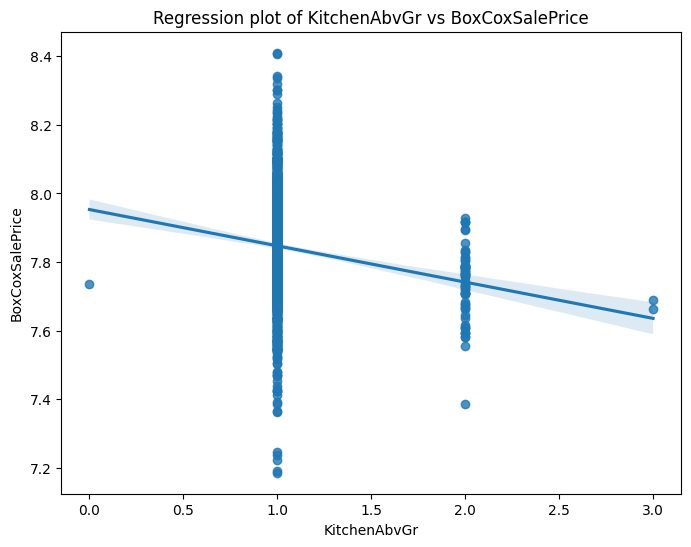

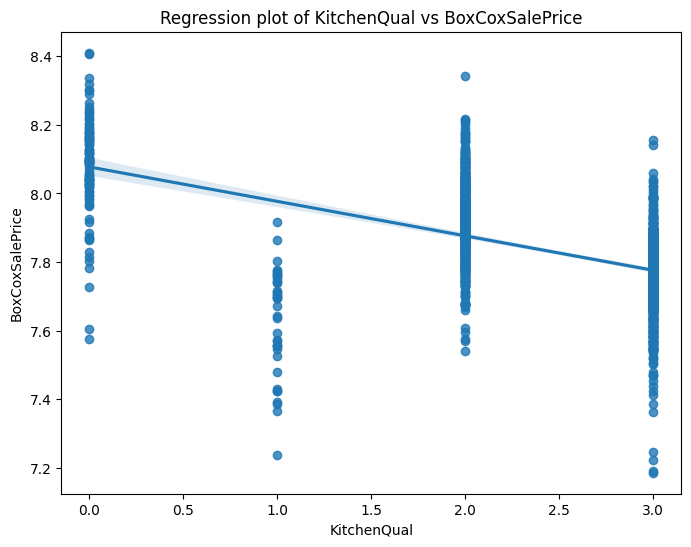

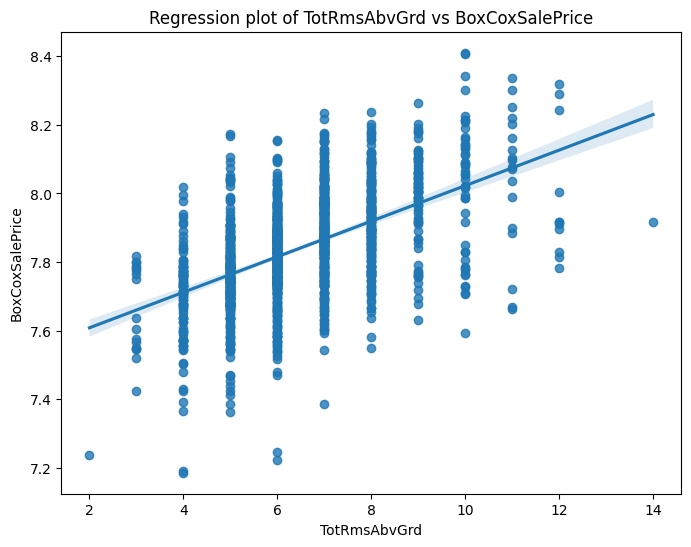

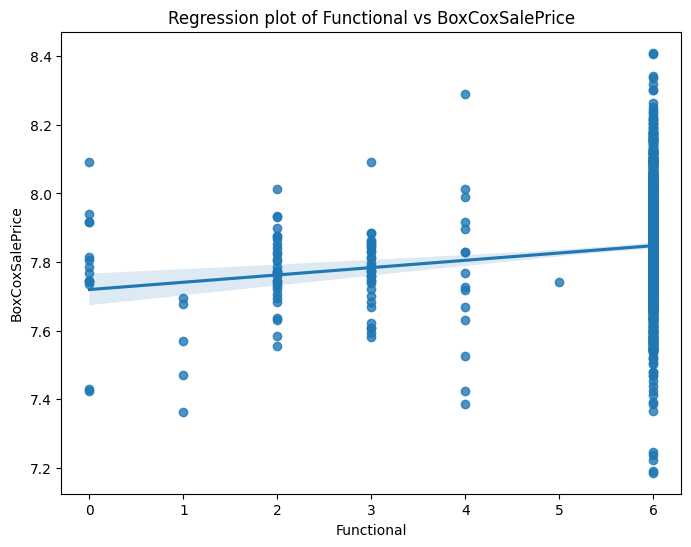

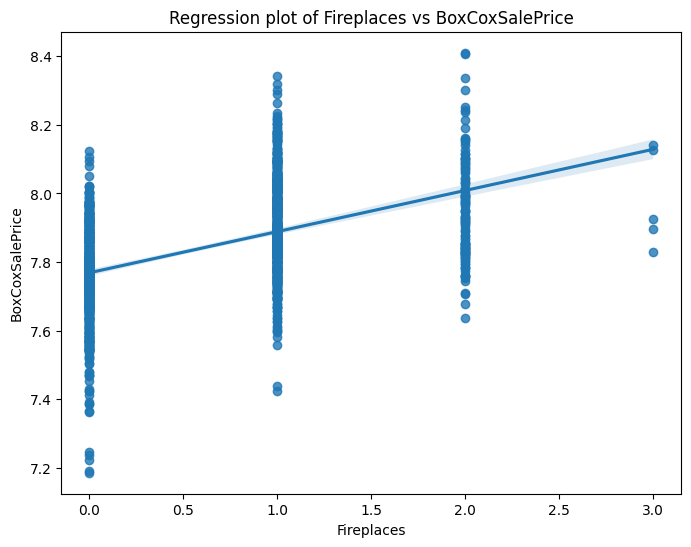

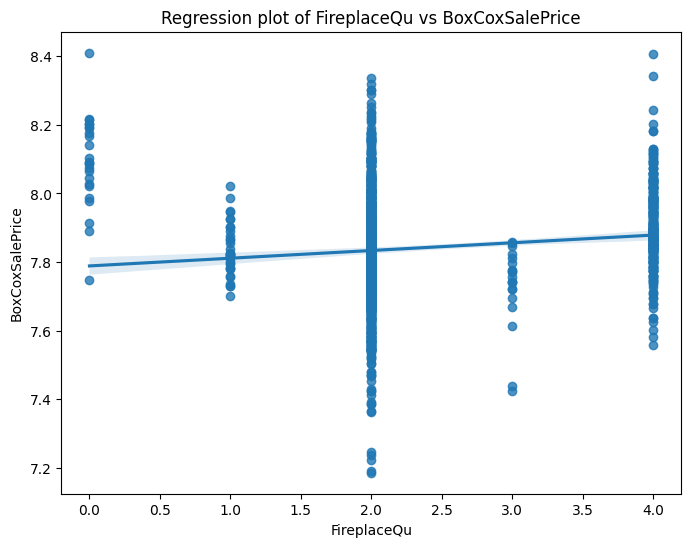

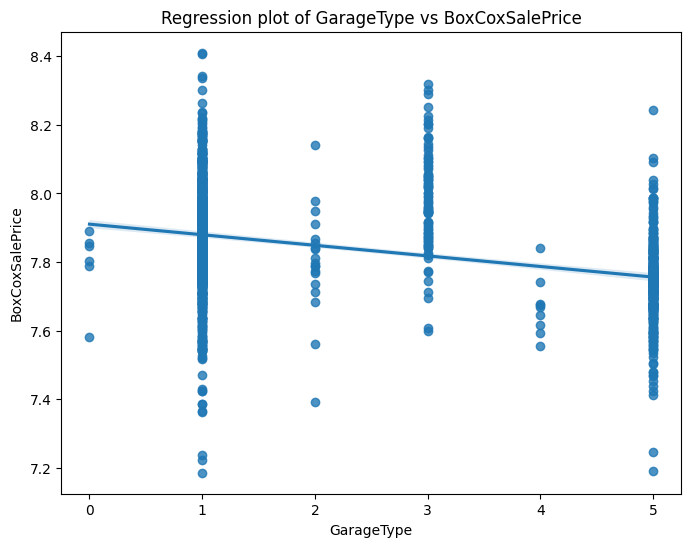

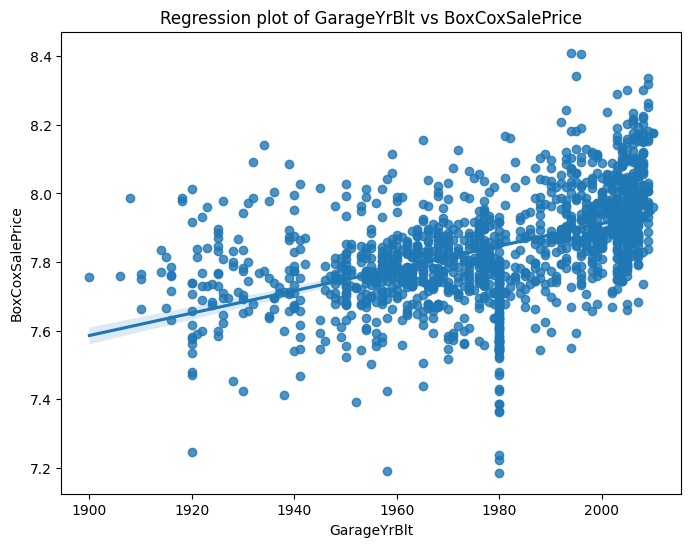

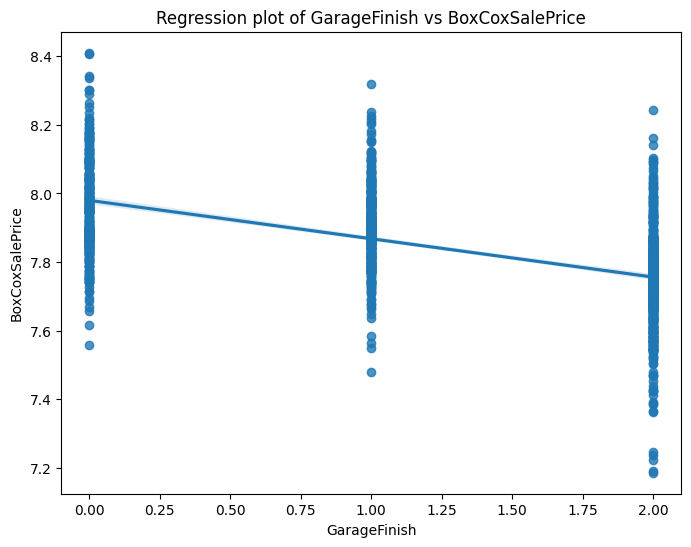

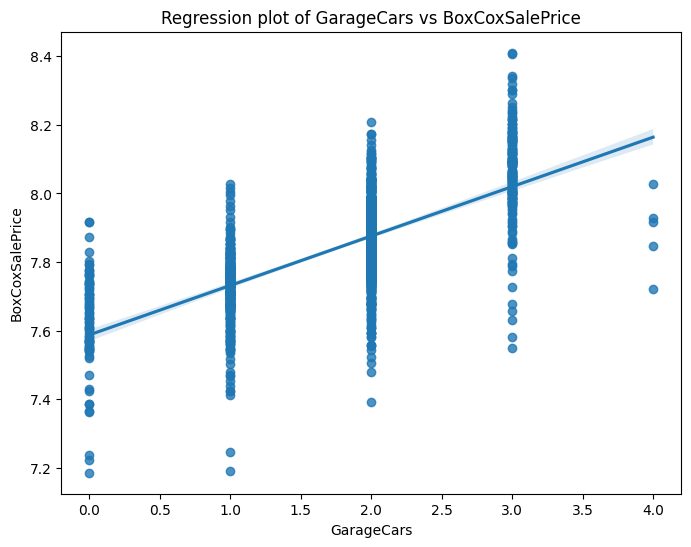

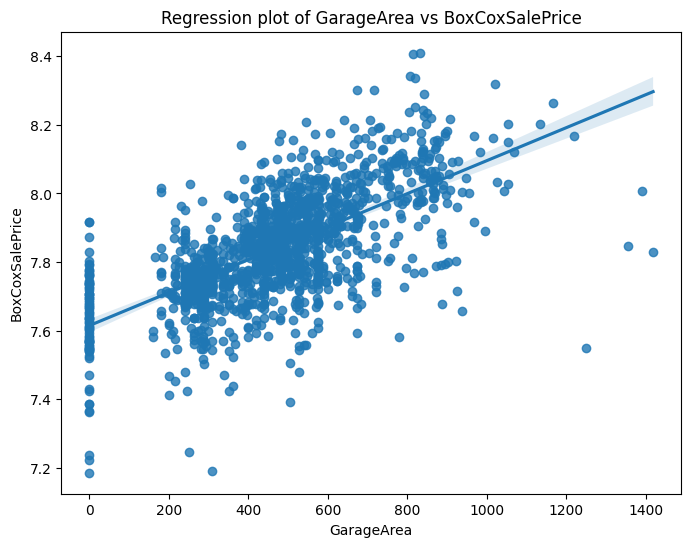

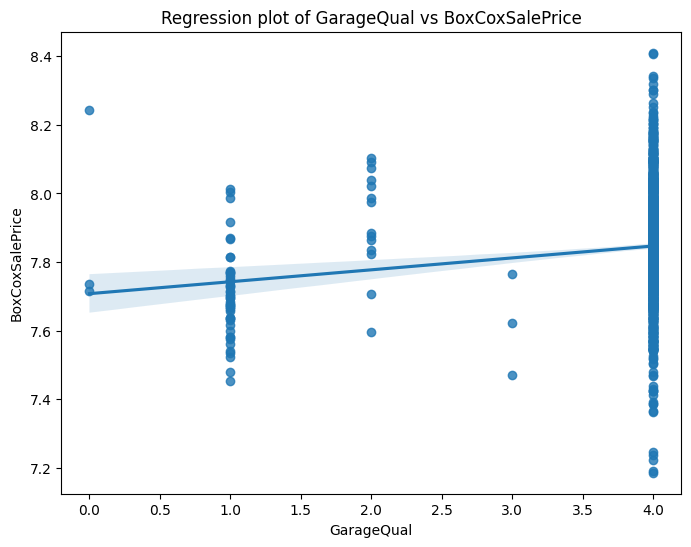

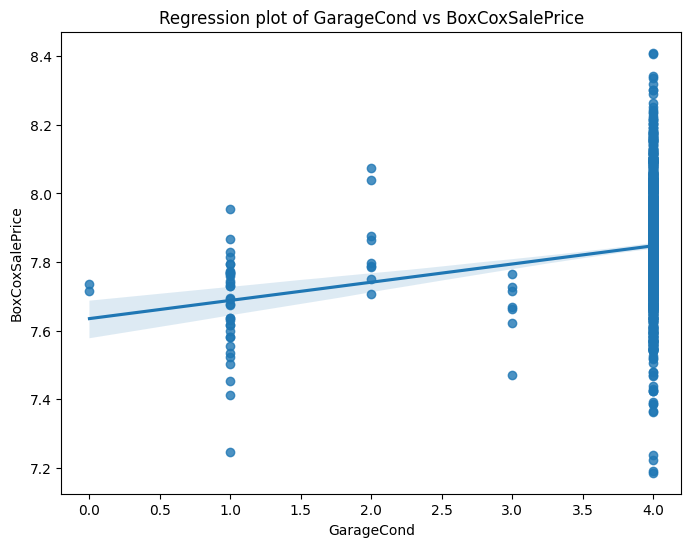

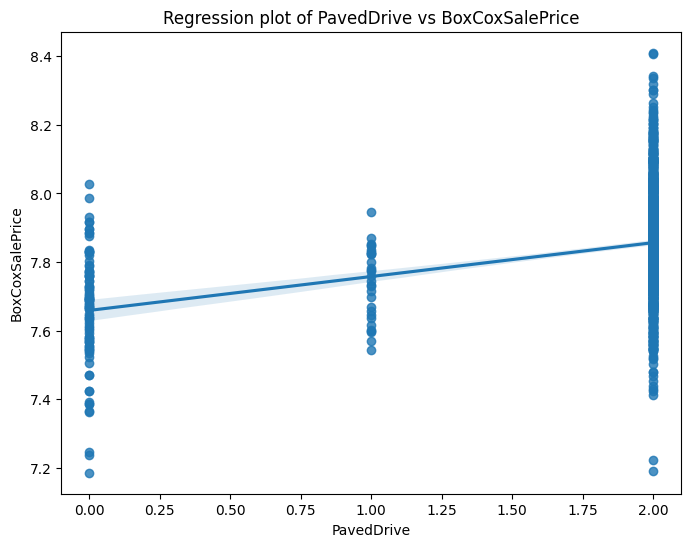

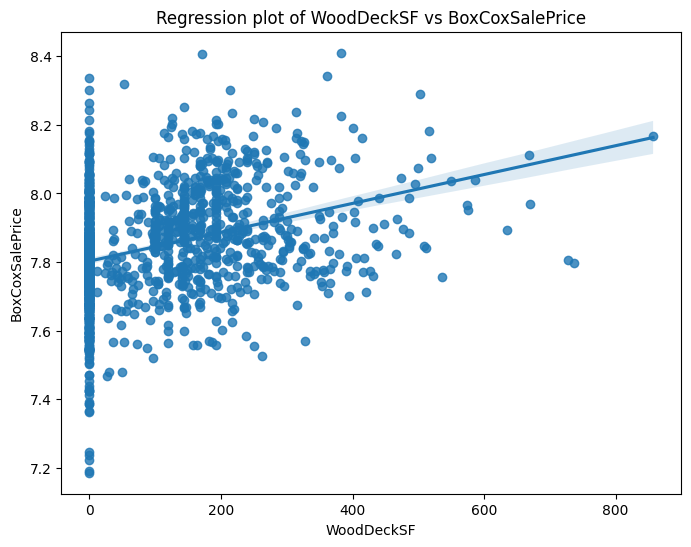

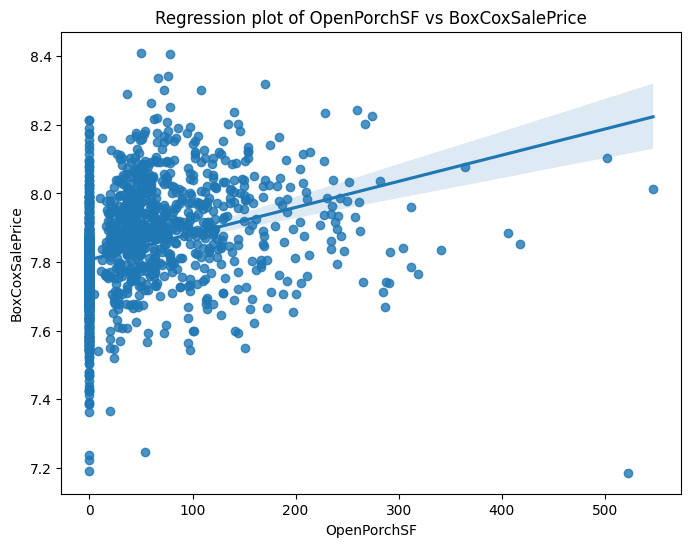

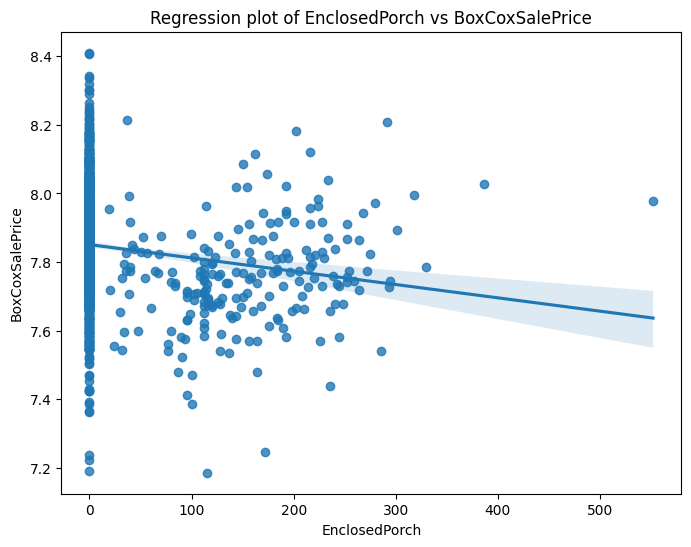

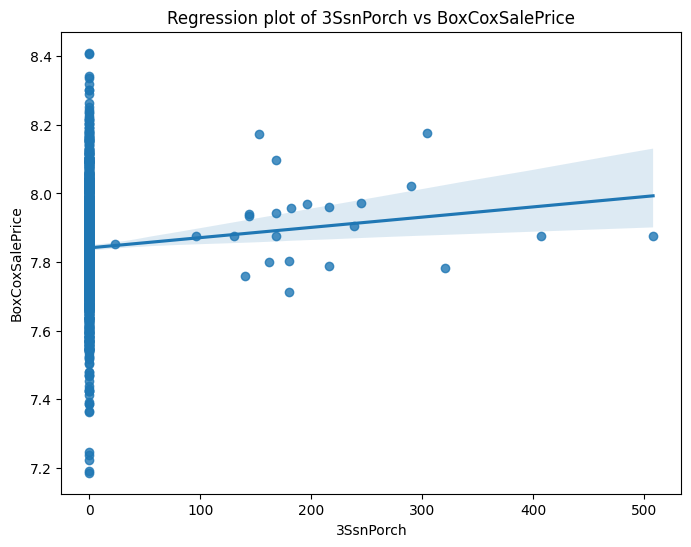

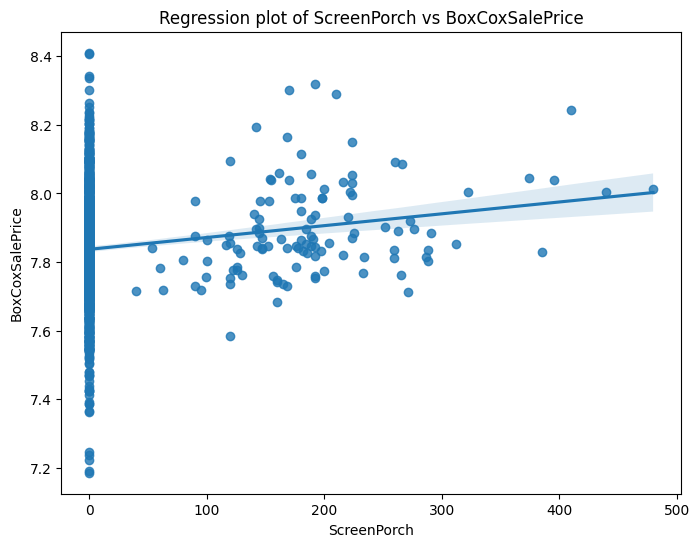

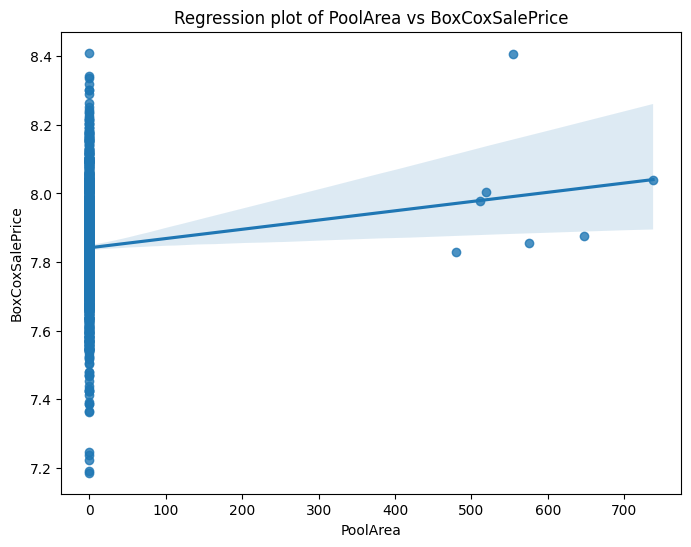

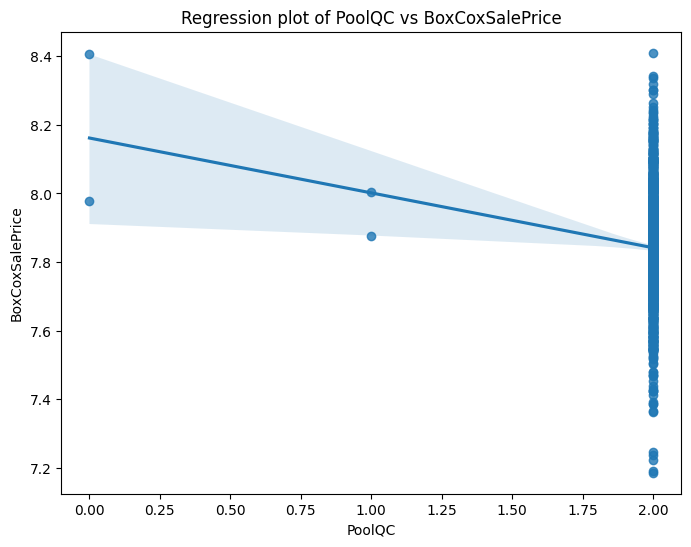

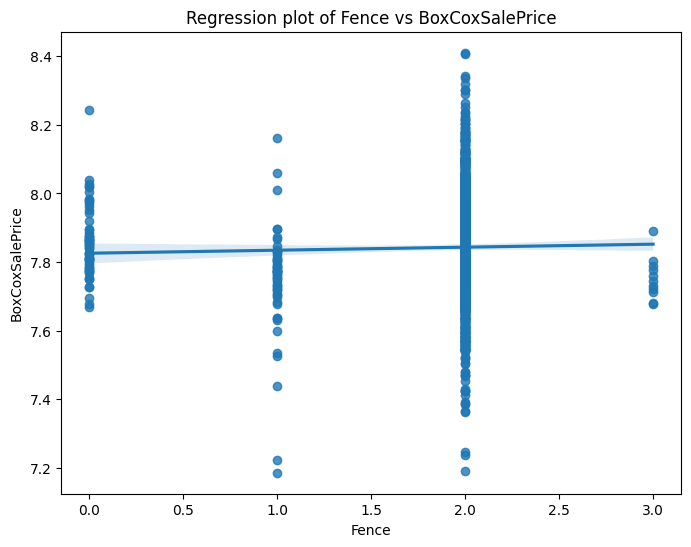

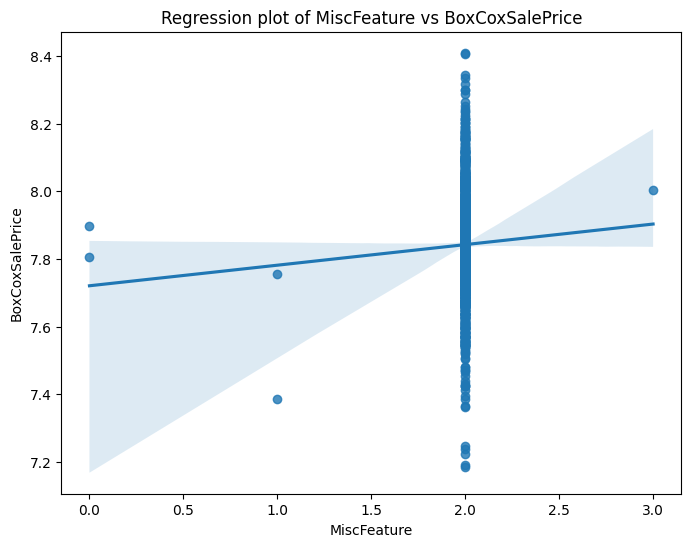

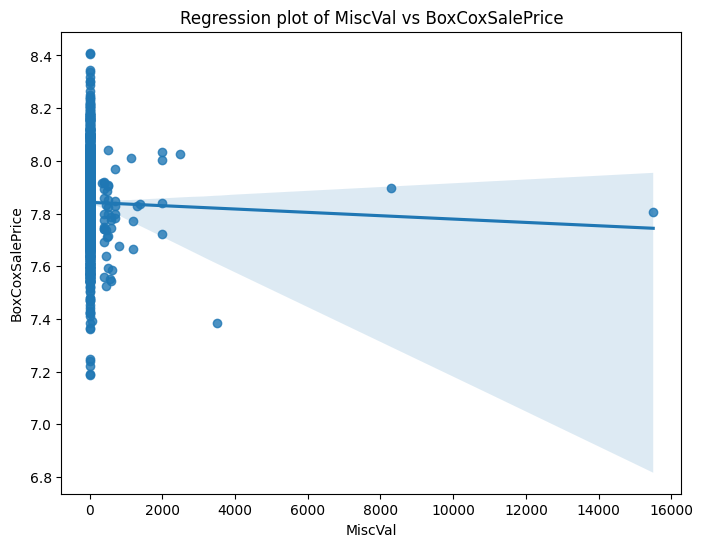

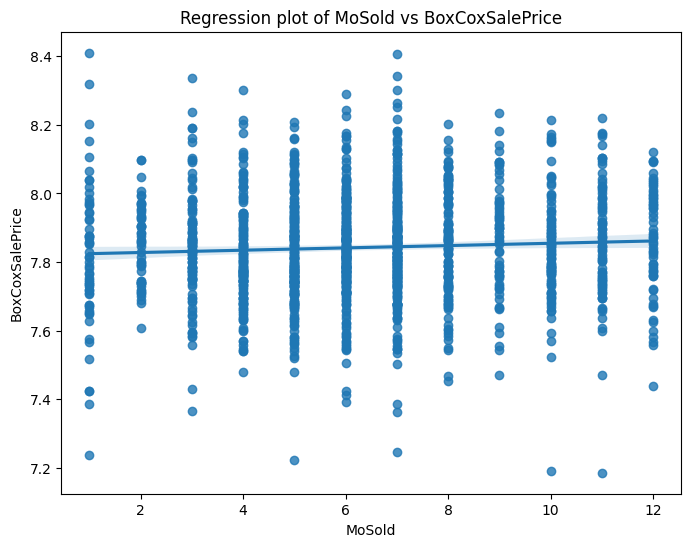

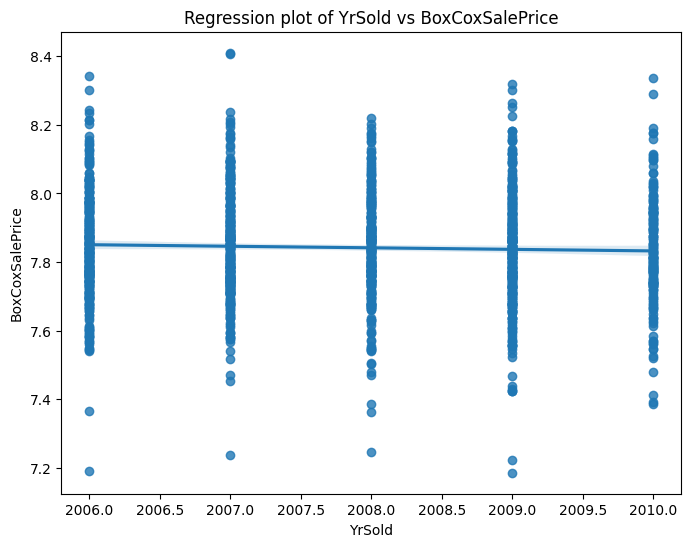

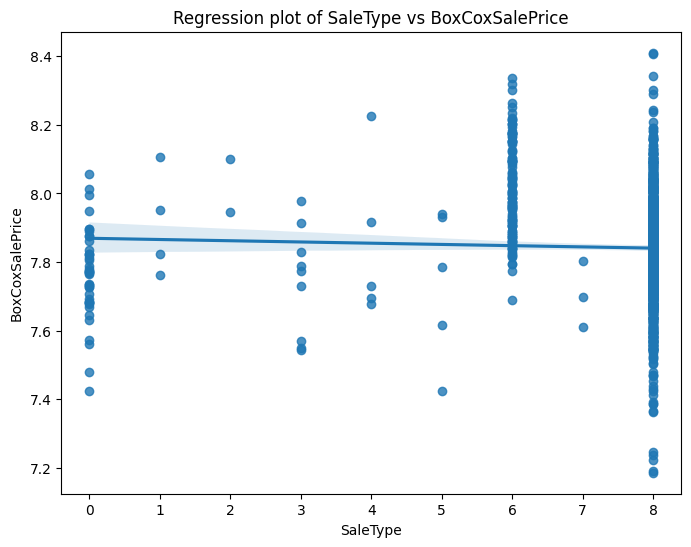

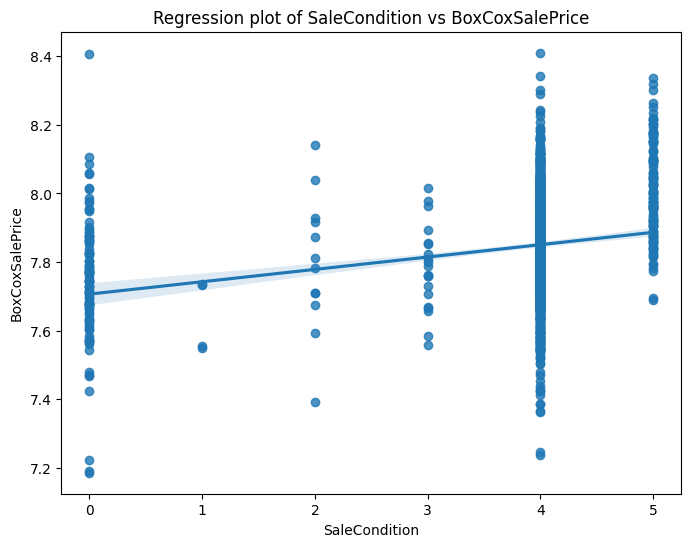

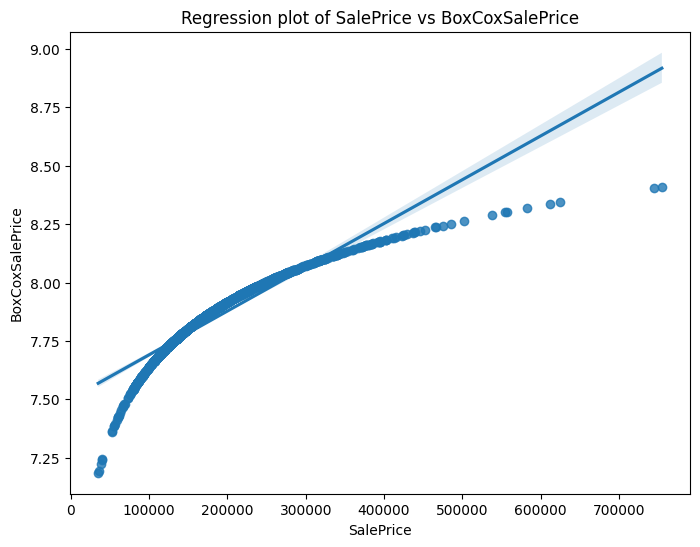

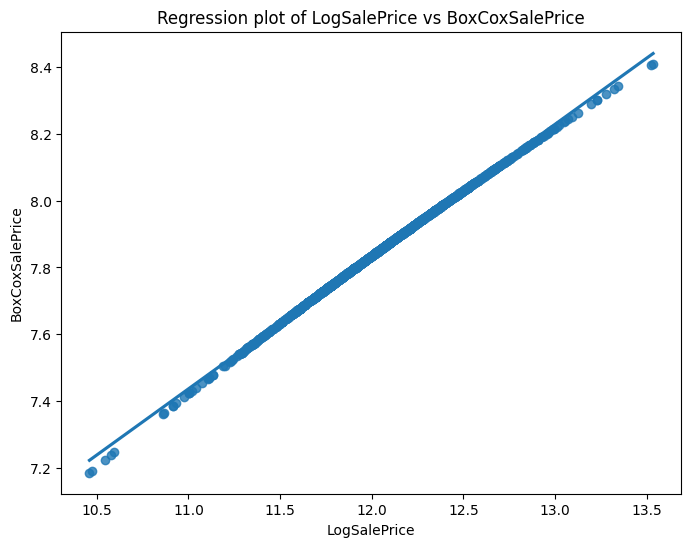

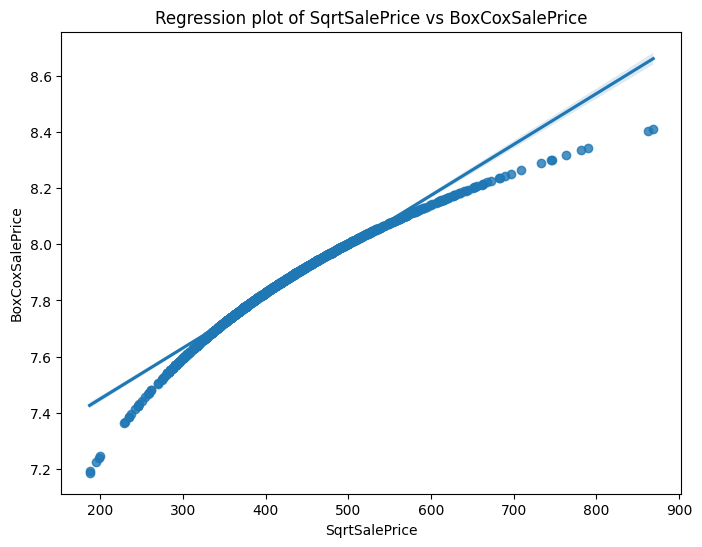

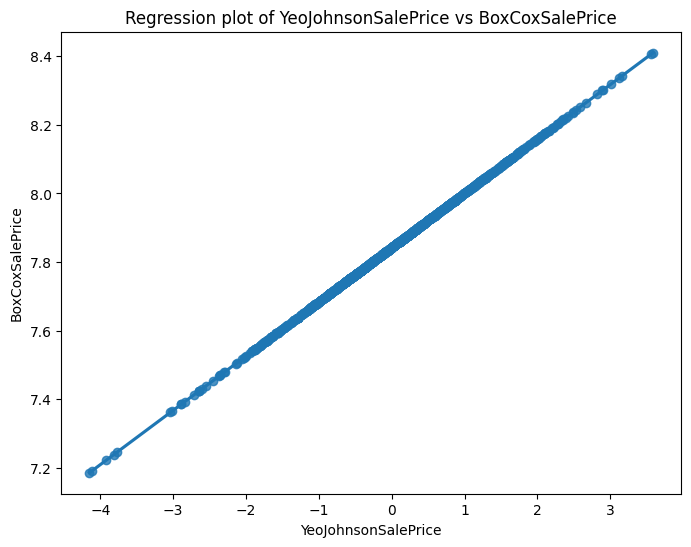

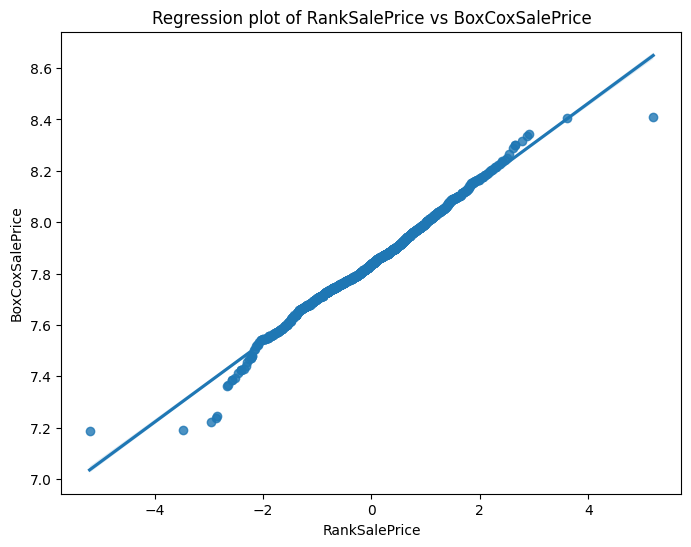

In [ ]:
# Define the reg_plot function
def reg_plot(df, column):
    numeric_cols = df.select_dtypes(include=[np.number])
    for col in numeric_cols.columns:
        if col != column:
            plt.figure(figsize=(8, 6))
            sns.regplot(x=numeric_cols[col], y=numeric_cols[column])
            plt.title(f'Regression plot of {col} vs {column}')
            plt.ylabel(column)
            plt.xlabel(col)
            plt.show()

# Regression plots for Box-Cox Transformed SalePrice
reg_plot(train_data, 'BoxCoxSalePrice')

Box-Cox transformation significantly normalizes the SalePrice distribution.
Reduced RMSE values indicate improved model performance.
Enhanced linear relationships between features and target variable.

# **Complete Data Preprocessing**

In [ ]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Fill missing values
for col in train_data.select_dtypes(include=[np.number]).columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    if col in test_data.columns:
        test_data[col].fillna(train_data[col].median(), inplace=True)

for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    if col in test_data.columns:
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in train_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    if col in test_data.columns:
        test_data[col] = le.transform(test_data[col].astype(str))
    label_encoders[col] = le

# Apply Box-Cox Transformation
train_data['BoxCoxSalePrice'], _ = stats.boxcox(train_data['SalePrice'])

# Prepare the data
X_train = train_data.drop(['SalePrice', 'BoxCoxSalePrice'], axis=1)
y_train = train_data['BoxCoxSalePrice']
X_test = test_data.copy()

# Ensure the test data has the same columns as the training data
X_test = X_test[X_train.columns]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding new features
train_data['YrBltAndRemod'] = train_data['YearBuilt'] + train_data['YearRemodAdd']
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
train_data['Total_sqr_footage'] = (train_data['BsmtFinSF1'] + train_data['BsmtFinSF2'] +
                                   train_data['1stFlrSF'] + train_data['2ndFlrSF'])
train_data['Total_Bathrooms'] = (train_data['FullBath'] + (0.5 * train_data['HalfBath']) +
                                 train_data['BsmtFullBath'] + (0.5 * train_data['BsmtHalfBath']))
train_data['Total_porch_sf'] = (train_data['OpenPorchSF'] + train_data['3SsnPorch'] +
                                train_data['EnclosedPorch'] + train_data['ScreenPorch'] +
                                train_data['WoodDeckSF'])

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7c8629709d80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 203, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 
[I 2024-07-16 14:10:57,791] A new study created in memory with name: no-name-decec86c-3b35-486b-b9d6-82f70ad1da65
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions

KeyError: '[0, 3, 11, 14, 15, 16, 18, 19, 27, 29, 30, 31, 32, 33, 35, 39, 40, 41, 42, 44, 46, 49, 51, 53, 55, 56, 58, 59, 61, 62, 63, 65, 67, 70, 73, 76, 77, 78, 81, 83, 85, 86, 87, 88, 89, 94, 96, 99, 100, 101, 103, 105, 107, 109, 111, 113, 115, 124, 125, 127, 129, 130, 131, 133, 136, 140, 144, 152, 155, 156, 158, 159, 160, 163, 164, 168, 170, 171, 175, 176, 177, 179, 181, 183, 186, 188, 190, 191, 193, 196, 198, 199, 203, 208, 209, 210, 213, 214, 216, 218, 221, 222, 223, 225, 229, 230, 231, 232, 233, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 257, 258, 259, 260, 264, 265, 266, 267, 270, 271, 272, 273, 275, 278, 279, 281, 282, 285, 287, 289, 291, 292, 294, 296, 297, 298, 300, 303, 304, 306, 307, 308, 309, 312, 316, 319, 320, 322, 323, 326, 327, 331, 332, 333, 335, 339, 341, 344, 345, 346, 348, 350, 353, 354, 355, 356, 358, 359, 363, 364, 365, 368, 370, 371, 372, 374, 376, 380, 381, 382, 383, 385, 387, 391, 394, 396, 397, 398, 400, 402, 404, 405, 408, 409, 410, 411, 412, 415, 416, 417, 422, 423, 425, 426, 427, 428, 429, 430, 431, 432, 433, 436, 437, 438, 439, 441, 444, 445, 446, 448, 450, 451, 454, 456, 457, 458, 459, 460, 464, 471, 472, 473, 475, 478, 481, 482, 483, 485, 490, 491, 493, 494, 498, 500, 506] not in index'

Feature engineering is essential even after applying the Box-Cox transformation. It helps in creating new features that can capture additional information and improve model performance. From the visualizations, new features like TotalSF, HouseAge, and TotalBath can provide better insights and stronger relationships with the transformed target variable (Box-Cox SalePrice).

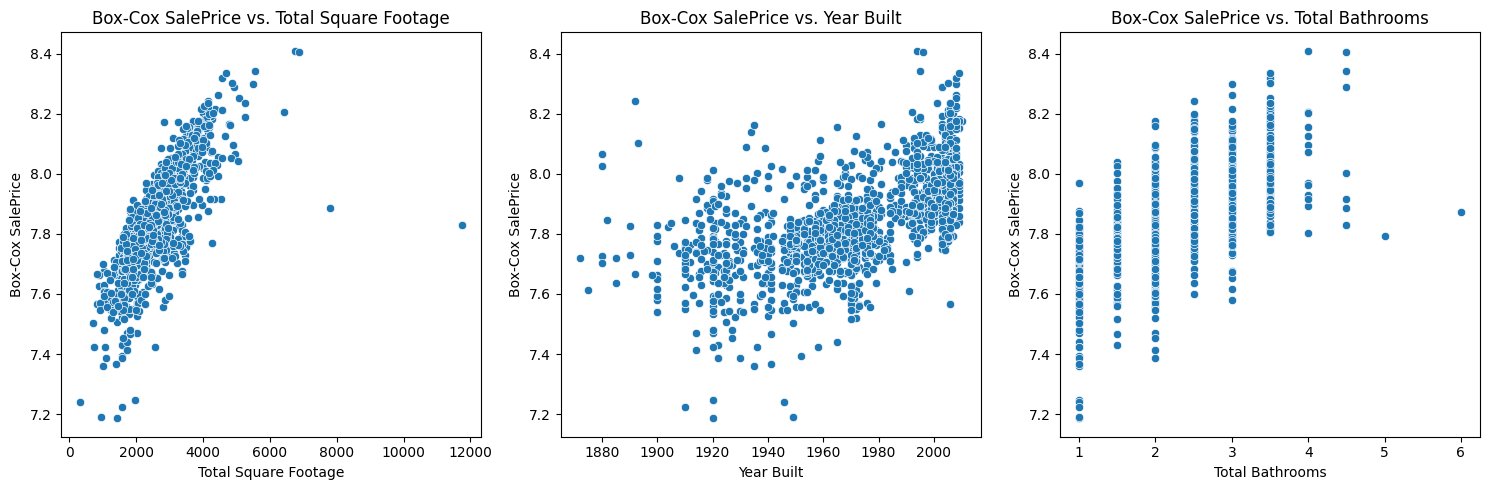

In [ ]:
# Visualize new features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TotalSF', y='BoxCoxSalePrice', data=train_data)
plt.title('Box-Cox SalePrice vs. Total Square Footage')
plt.xlabel('Total Square Footage')
plt.ylabel('Box-Cox SalePrice')

plt.subplot(1, 3, 2)
sns.scatterplot(x='YearBuilt', y='BoxCoxSalePrice', data=train_data)
plt.title('Box-Cox SalePrice vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Box-Cox SalePrice')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Total_Bathrooms', y='BoxCoxSalePrice', data=train_data)
plt.title('Box-Cox SalePrice vs. Total Bathrooms')
plt.xlabel('Total Bathrooms')
plt.ylabel('Box-Cox SalePrice')

plt.tight_layout()
plt.show()

First, the dataset is loaded, and missing values in numerical columns are filled with their respective medians, while missing values in categorical columns are filled with their most frequent values. Next, categorical variables are encoded using LabelEncoder, transforming text labels into numeric values for power transform up next. A Box-Cox transformation is then applied to the target variable ('SalePrice') for normality. Subsequently, the features are prepared by dropping the target columns from the training data, ensuring that the test data has matching columns. Finally, the features are scaled using StandardScaler to standardize the data.

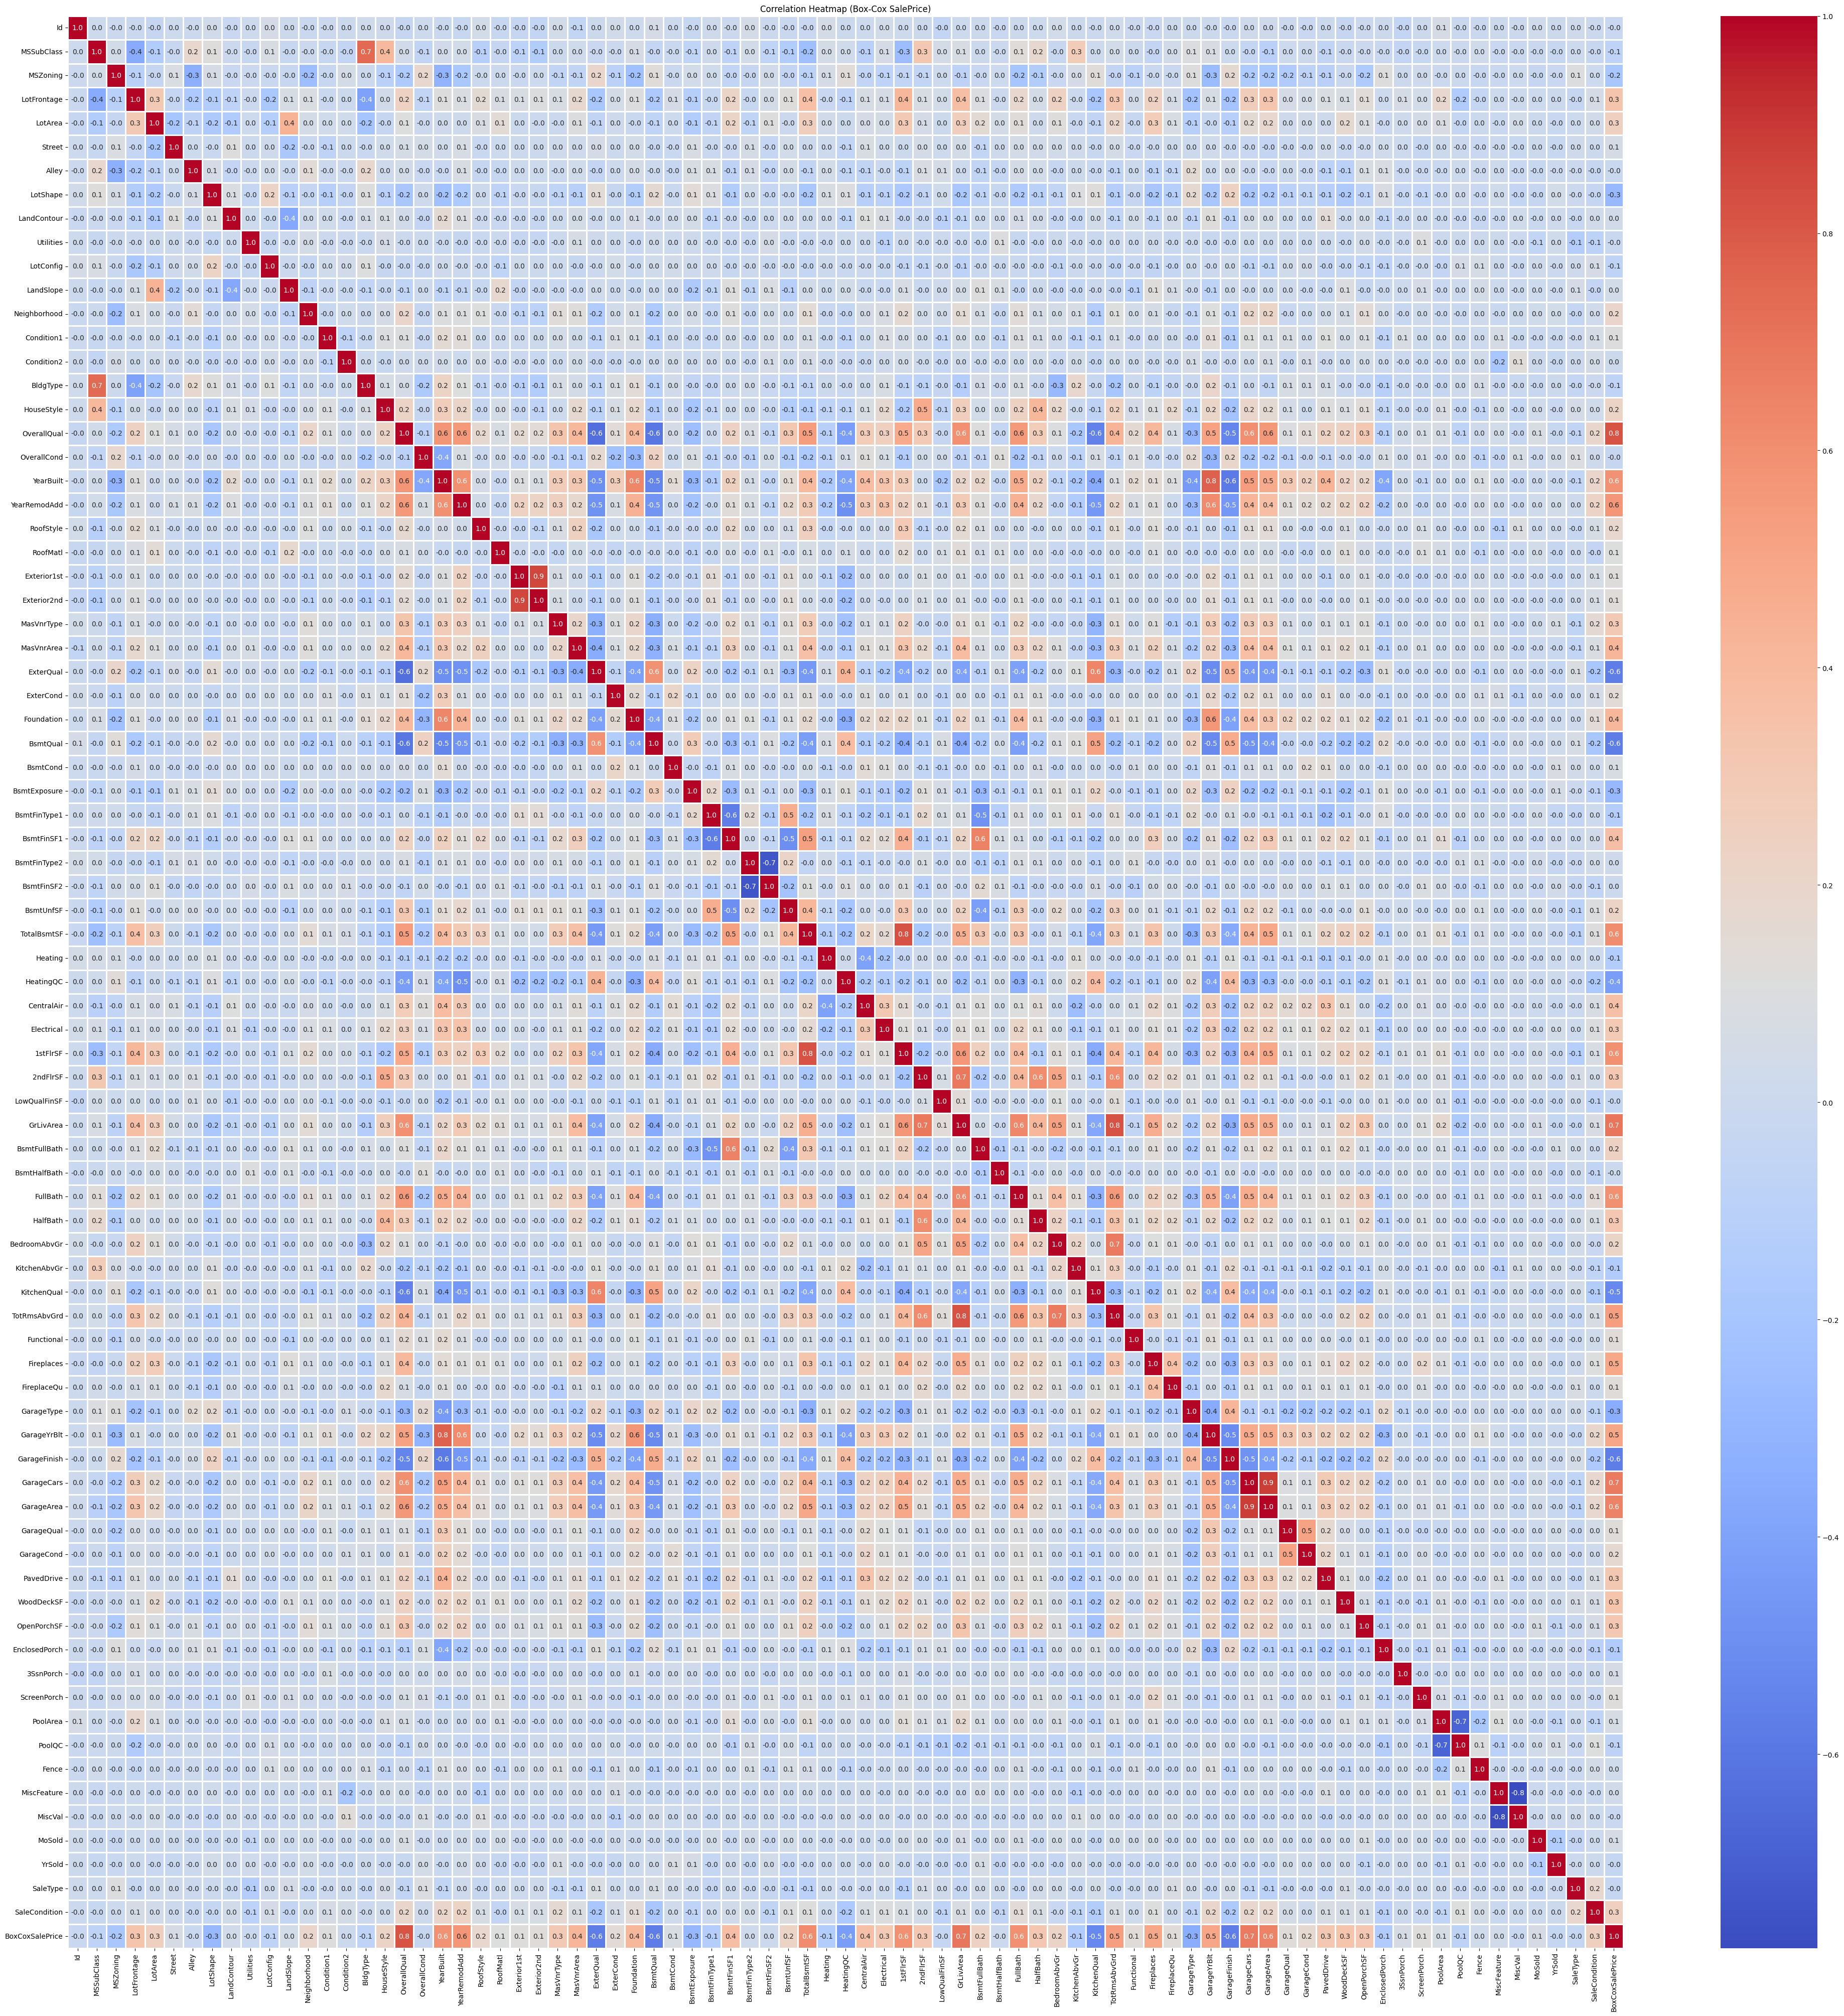

In [ ]:
# Create correlation heatmap
numeric_cols = X_train.copy()
numeric_cols['BoxCoxSalePrice'] = y_train

plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(numeric_cols.corr(), annot=True, fmt=".1f", cmap='coolwarm', linewidths=1)
heatmap.set_title('Correlation Heatmap (Box-Cox SalePrice)')
plt.show()

The correlation heatmap shows strong positive correlations between BoxCoxSalePrice and features like OverallQual, GrLivArea, GarageCars, and TotalBsmtSF. These features are crucial predictors for house prices, indicating higher quality, larger living areas, and more garage space are strongly linked to higher sale prices.

In [ ]:
# Train and evaluate Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_train_pred_lr = lr_model.predict(X_train_scaled)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))

# Train and evaluate SGDRegressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_scaled, y_train)
y_train_pred_sgd = sgd_model.predict(X_train_scaled)
train_rmse_sgd = np.sqrt(mean_squared_error(y_train, y_train_pred_sgd))

print(f'Linear Regression RMSE on Training Set: {train_rmse_lr}')
print(f'SGD Regressor RMSE on Training Set: {train_rmse_sgd}')

# Select the better model
best_model = lr_model if train_rmse_lr < train_rmse_sgd else sgd_model

# Predict on the test set using the best model
test_pred = best_model.predict(X_test_scaled)

# Handle infinite values
test_pred = np.where(np.isinf(test_pred), np.nan, test_pred)
test_pred = np.where(np.isnan(test_pred), np.nanmedian(test_pred), test_pred)

# Transform predictions back to the original scale
test_pred_original_scale = np.expm1(test_pred)  # Inverse of Box-Cox transformation

# Ensure no infinite or NaN values in the predictions
test_pred_original_scale = np.where(np.isinf(test_pred_original_scale), np.nan, test_pred_original_scale)
test_pred_original_scale = np.where(np.isnan(test_pred_original_scale), np.nanmedian(test_pred_original_scale), test_pred_original_scale)

# Prepare submission file
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_pred_original_scale
})
submission.to_csv('submission.csv', index=False)
print('Submission file created successfully!')

Linear Regression RMSE on Training Set: 0.053512327205215385
SGD Regressor RMSE on Training Set: 0.05457415118047126
Submission file created successfully!


<ipython-input-42-ef42248a86e2>:27: RuntimeWarning: overflow encountered in expm1
  test_pred_original_scale = np.expm1(test_pred)  # Inverse of Box-Cox transformation


a Linear Regression model is trained and evaluated on the scaled training data, with the RMSE calculated for performance. Similarly, an SGDRegressor model is trained and evaluated, and the model with the lower RMSE is selected as the best model. This best model is then used to predict on the scaled test data, with infinite values handled and predictions transformed back to the original scale using the inverse Box-Cox transformation. Finally, a submission file is prepared with the test data IDs and the predicted sale prices, ensuring no infinite or NaN values, and saved as 'submission.csv'.

first try: lowest rmse on training - 0.045

---



---


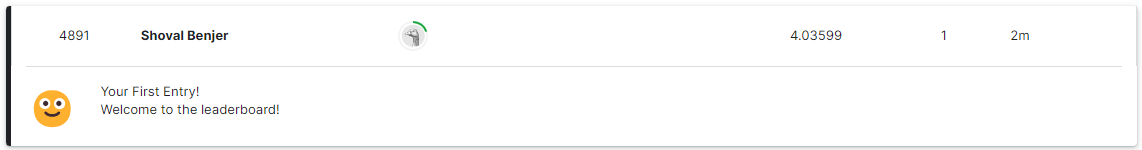

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Define LOOCV
loo = LeaveOneOut()

# Define LassoCV model with LOOCV
alphas = np.logspace(-4, 0, 50)
lasso_model = make_pipeline(RobustScaler(), LassoCV(alphas=alphas, max_iter=10000, random_state=42, cv=loo))

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred_lasso = lasso_model.predict(X_train)
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
train_mae_lasso = mean_absolute_error(y_train, y_train_pred_lasso)

n = len(y_train)
p = X_train.shape[1]
train_adj_r2_lasso = 1 - (1 - train_r2_lasso) * (n - 1) / (n - p - 1)

print(f'Lasso Regression RMSE on Training Set: {train_rmse_lasso}')
print(f'Lasso Regression R² on Training Set: {train_r2_lasso}')
print(f'Lasso Regression Adjusted R² on Training Set: {train_adj_r2_lasso}')
print(f'Lasso Regression MAE on Training Set: {train_mae_lasso}')

# Predict on the validation set
y_val_pred_lasso = lasso_model.predict(X_val)
val_rmse_lasso = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))
val_r2_lasso = r2_score(y_val, y_val_pred_lasso)
val_mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)

n_val = len(y_val)
val_adj_r2_lasso = 1 - (1 - val_r2_lasso) * (n_val - 1) / (n_val - p - 1)

print(f'Lasso Regression RMSE on Validation Set: {val_rmse_lasso}')
print(f'Lasso Regression R² on Validation Set: {val_r2_lasso}')
print(f'Lasso Regression Adjusted R² on Validation Set: {val_adj_r2_lasso}')
print(f'Lasso Regression MAE on Validation Set: {val_mae_lasso}')

# Predict on the test set
test_pred_lasso = lasso_model.predict(X_test_scaled)

# Handle infinite values
test_pred_lasso = np.where(np.isinf(test_pred_lasso), np.nan, test_pred_lasso)
test_pred_lasso = np.where(np.isnan(test_pred_lasso), np.nanmedian(test_pred_lasso), test_pred_lasso)

# Transform predictions back to the original scale
test_pred_lasso_original_scale = np.expm1(test_pred_lasso)  # Inverse of Box-Cox transformation

# Ensure no infinite or NaN values in the predictions
test_pred_lasso_original_scale = np.where(np.isinf(test_pred_lasso_original_scale), np.nan, test_pred_lasso_original_scale)
test_pred_lasso_original_scale = np.where(np.isnan(test_pred_lasso_original_scale), np.nanmedian(test_pred_lasso_original_scale), test_pred_lasso_original_scale)

# Prepare submission file
submission_lasso = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_pred_lasso_original_scale
})
submission_lasso.to_csv('submission_lasso.csv', index=False)
print('Lasso Submission file created successfully!')


Lasso Regression RMSE on Training Set: 0.05716019112185389
Lasso Regression R² on Training Set: 0.863293890306751
Lasso Regression Adjusted R² on Training Set: 0.853232723080017
Lasso Regression MAE on Training Set: 0.037538483804294955
Lasso Regression RMSE on Validation Set: 0.06367451350179677
Lasso Regression R² on Validation Set: 0.86205885684438
Lasso Regression Adjusted R² on Validation Set: 0.8097588973540975
Lasso Regression MAE on Validation Set: 0.04327726848974205
Lasso Submission file created successfully!


to execute this code, run preprocess step again.

In [ ]:
def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1.0)
    lasso = make_pipeline(RobustScaler(), LassoCV(alphas=[alpha], max_iter=10000, random_state=42, cv=loo))

    # Fit the model
    lasso.fit(X_train_scaled, y_train)

    # Predict on the training set
    y_train_pred = lasso.predict(X_train_scaled)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    return train_rmse

# Create a study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_alpha = study.best_params['alpha']
print(f'Best alpha: {best_alpha}')

# Train the final model with the best hyperparameters
final_lasso_model = make_pipeline(RobustScaler(), LassoCV(alphas=[best_alpha], max_iter=10000, random_state=42, cv=loo))
final_lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
test_pred_final_lasso = final_lasso_model.predict(X_test_scaled)

# Handle infinite values
test_pred_final_lasso = np.where(np.isinf(test_pred_final_lasso), np.nan, test_pred_final_lasso)
test_pred_final_lasso = np.where(np.isnan(test_pred_final_lasso), np.nanmedian(test_pred_final_lasso), test_pred_final_lasso)

# Transform predictions back to the original scale
test_pred_final_lasso_original_scale = np.expm1(test_pred_final_lasso)  # Inverse of Box-Cox transformation

# Ensure no infinite or NaN values in the predictions
test_pred_final_lasso_original_scale = np.where(np.isinf(test_pred_final_lasso_original_scale), np.nan, test_pred_final_lasso_original_scale)
test_pred_final_lasso_original_scale = np.where(np.isnan(test_pred_final_lasso_original_scale), np.nanmedian(test_pred_final_lasso_original_scale), test_pred_final_lasso_original_scale)

# Prepare submission file
submission_final_lasso = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_pred_final_lasso_original_scale
})
submission_final_lasso.to_csv('submission_final_lasso.csv', index=False)
print('Final Lasso Submission file created successfully!')


[I 2024-07-08 15:10:25,679] A new study created in memory with name: no-name-53512fa7-f41f-4937-85bb-0b7389b927e2
<ipython-input-47-cc253058a798>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1.0)
[I 2024-07-08 15:10:40,107] Trial 0 finished with value: 0.053600281400385016 and parameters: {'alpha': 0.0002373628492740164}. Best is trial 0 with value: 0.053600281400385016.
<ipython-input-47-cc253058a798>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1.0)
[I 2024-07-08 15:10:50,405] Trial 1 finished with value: 0.1582032951430112 and parameters: {'alpha': 0.18829647706841

Best alpha: 0.00010016550969883015
Final Lasso Submission file created successfully!


were ranked 4891/25000 submission for our first try which is not bad at all.
nevertheless, we can improve using more techniques.
for the second attempt we will add Cross validation and hyperparameter tuning using optuna

as we can see from the results when using lasso and loocv methods, and by adding hyperparemeter tuning by optuna we still got suboptimal results than first try.

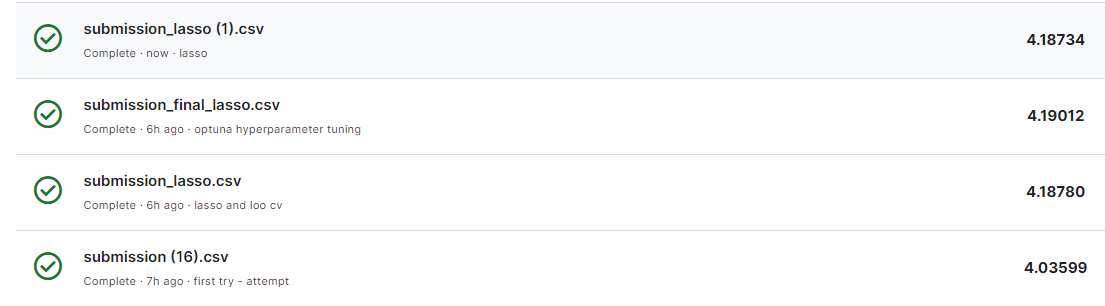

# **Conclusion**
our first linear regressor after box-cox has gotten best result (4.035). using gradient decent/linear regresson methods has restricted our progress. we will try to use in later projects methods like gradient boosting, ensemble, blending different models, removing outliers, stacking and unsupervised learning.

----
----
# **Phase 4 Adaptation**

In [2]:
!pip install --upgrade shap-hypetune

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.0/966.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 23.8 MB/s eta 0:00:00
  Attempting uninstall: hyperopt
    Found existing installation: hyperopt 0.2.7
    Uninstalling hyperopt-0.2.7:
      Successfully uninstalled hyperopt-0.2.7


In [ ]:
import numpy as np
import pandas as pd
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
import xgboost as xgb
import lightgbm as lgb
import optuna
from shaphypetune import BoostRFE, BoostRFA

# Set plotting styles
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [ ]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Drop 'Id' column
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

# Handle outliers
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

# Log-transform the target variable
train["SalePrice"] = np.log1p(train["SalePrice"])

# Combine train and test data
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

# Fill missing values
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

# Transform numerical variables that are really categorical
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

# Label Encoding categorical variables
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

# Add total square footage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Box-Cox Transformation of skewed features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: np.abs(skew(x))).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness['Skew']) > 0.75]
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

# Getting dummy categorical features
all_data = pd.get_dummies(all_data)
train = all_data[:ntrain]
test = all_data[ntrain:]

In [15]:
# Define RMSLE evaluation function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Base models
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state=7, nthread=-1)
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin=55, bagging_fraction=0.8,
                              bagging_freq=5, feature_fraction=0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

# Averaging base models
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)

# Stacking averaged models class
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for _ in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

# RMSE of stacked regressors
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

# submit the stack model
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = stacked_pred
sub.to_csv('submission.csv',index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+11, tolerance: 7.122e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.910e+11, tolerance: 7.369e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.855e+11, tolerance: 7.328e

11249.174857556916


<ipython-input-15-46c69a1e15d9>:185: RuntimeWarning: overflow encountered in expm1
  stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))


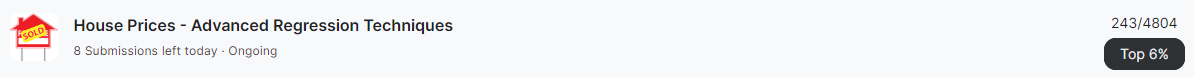

Lasso (Least Absolute Shrinkage and Selection Operator): Regularization technique that adds a penalty equivalent to the absolute value of the magnitude of coefficients. Useful for feature selection by forcing some coefficients to be exactly zero.

ElasticNet: Combines L1 and L2 regularization of the Lasso and Ridge methods. It is useful when there are multiple features that are correlated with one another.

Kernel Ridge Regression (KRR): Combines ridge regression (linear least squares with L2-norm regularization) with the kernel trick. This allows for nonlinear predictions by projecting the data into a higher-dimensional space.

Gradient Boosting Regressor (GBoost): An ensemble learning technique that builds multiple decision trees, where each new tree corrects errors made by the previous ones.

XGBoost: An optimized gradient boosting library designed to be highly efficient and flexible. It has numerous hyperparameters to tune, making it very powerful.

LightGBM: A gradient boosting framework that uses tree-based learning algorithms, designed for efficiency and scalability.

K-Nearest Neighbors (KNN): A non-parametric method that predicts the output based on the k-nearest neighbors in the training dataset.

Decision Tree Regressor: A non-parametric supervised learning method used for regression. It splits the data into subsets based on the feature values.

Support Vector Machine (SVM): Uses support vectors and margins to find the optimal boundary for regression. In this case, we use the SVR with a linear kernel.